<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Covid-Cases-From-Google-Search-Data:-A-Time-Series-Analysis" data-toc-modified-id="Predicting-Covid-Cases-From-Google-Search-Data:-A-Time-Series-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting Covid Cases From Google Search Data: A Time Series Analysis</a></span></li><li><span><a href="#Business-and-Data-Understanding" data-toc-modified-id="Business-and-Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business and Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Limitations-of-the-dataset:" data-toc-modified-id="Limitations-of-the-dataset:-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Limitations of the dataset:</a></span></li><li><span><a href="#Why-We-Used-This-Dataset" data-toc-modified-id="Why-We-Used-This-Dataset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Why We Used This Dataset</a></span></li><li><span><a href="#Dataset-Size" data-toc-modified-id="Dataset-Size-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Dataset Size</a></span></li></ul></li></ul></li><li><span><a href="#Initial-Look-at-the-Data" data-toc-modified-id="Initial-Look-at-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initial Look at the Data</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Google-Search-Data" data-toc-modified-id="Google-Search-Data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Google Search Data</a></span></li><li><span><a href="#Public-COVID-19-PA-Data" data-toc-modified-id="Public-COVID-19-PA-Data-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Public COVID-19 PA Data</a></span></li><li><span><a href="#Joining-the-Google-and-Public-COVID-19-Data" data-toc-modified-id="Joining-the-Google-and-Public-COVID-19-Data-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Joining the Google and Public COVID-19 Data</a></span></li></ul></li><li><span><a href="#Initial-Visualizations" data-toc-modified-id="Initial-Visualizations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Initial Visualizations</a></span><ul class="toc-item"><li><span><a href="#Test-Train-Split:-Target-Variable" data-toc-modified-id="Test-Train-Split:-Target-Variable-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Test Train Split: Target Variable</a></span></li></ul></li><li><span><a href="#Base-Model-of-the-Target-Variable" data-toc-modified-id="Base-Model-of-the-Target-Variable-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Base Model of the Target Variable</a></span></li></ul></li></ul></div>

# Predicting Covid Cases From Google Search Data: A Time Series Analysis

# Business and Data Understanding

## Business Problem

The state of Pennsylvania has been tracking it's COVID-19 cases since the beginning of the pandemic. They want to know if by looking into the Google search data, it would be possible to predict (or at least find a correlation) between COVID-19 rates. If some kind of prediction can be made it would be useful to be able to prepare for spikes in COVID-19 cases and increase preventative measures (mask mandates, encouraging social distancing ect.) when needed. In order to test if this is possible on one county before looking further into the other 67 counties in PA, they specifically asked to take a look at the city of Philadelphia's COVID-19 data. 

## Data
In order to do this analysis, there were two data sets that we put together. 

The independent variables were taken from [Google's Explore COVID-19 Symptoms Search Trends](https://pair-code.github.io/covid19_symptom_dataset/?country=IE). The data was downloaded from the USA region (sub region of Pennsylvania) at the daily resolution. All of the data from January 1st, 2020 through November 11th, 2022 was then collated into one data frame, containing 68,805 rows and 430 columns. This data had all been [scaled and normalized](https://storage.googleapis.com/gcp-public-data-symptom-search/COVID-19%20Search%20Trends%20symptoms%20dataset%20documentation%20.pdf) prior to being downloaded. 

The target variable was taken from [COVID-19 Data for Pennsylvania](https://www.health.pa.gov/topics/disease/coronavirus/pages/Cases.aspx). This data spanned from March 1st, 2020 until March 14, 2023 and included 75,412 rows and 12 columns. 

### Limitations of the dataset:
While these two datasets do included a fairly comprehensive list of the search terms and COVID-19 case counts, it does not include all of the possible relevant elements relevant to the rise and fall of COVID-19 cases - for example they doesn't take into account the proliferation of novel versions of the virus (delta, omicron, etc.). The dataset is also limited by time - [COVID-19 was only proclaimed a pandemic by the World Health Organization on March 11th, 2020](https://www.yalemedicine.org/news/covid-timeline). As such, it could be that better predictions will be available as more time passed, allowing for more time series data to be collected. 

### Why We Used This Dataset
As the initial inquiry was about if search trends could be used to predict COVID-19, we felt that this was a perfect place to start! All of the acquired data was free and publicly available. 

### Dataset Size
Initially, we had two datasets, one with **68,805** rows and **430** columns, the other with **75,412** rows and **12 columns**. After subsetting these datasets to include **only the Philadelphia region**, cleaning the data, and matching the dates of the datasets, we had **991** rows (representing from March 8th, 2020 to November 13th, 2022)  We then used the [CDC's COVID-19 symptom testing recommendations](https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html) to choose 15 features to further explore, leaving us with **16** columns. 



# Initial Look at the Data
 
 
## Imports

In [1]:
# imports
import pmdarima as pm
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import log
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
# bringing in our 4 dataframes

public_data = pd.read_csv(
    "COVID-19_Aggregate_Cases_Current_Weekly_County_Health.csv")
google_data_2020 = pd.read_csv(
    "2020_sub_region_1_daily_2020_US_Pennsylvania_daily_symptoms_dataset.csv",  dtype=str)
google_data_2021 = pd.read_csv(
    "2021_sub_region_1_daily_2021_US_Pennsylvania_daily_symptoms_dataset(1).csv", dtype=str)
google_data_2022 = pd.read_csv(
    "2022_sub_region_1_daily_2022_US_Pennsylvania_daily_symptoms_dataset(1).csv", dtype=str)

## Data Preprocessing

### Google Search Data

Lets start by consolidating all of our separate Google .csv files into one data frame. 

In [3]:
# consolidating the google data into one dataframe
google_dataframes = [google_data_2020, google_data_2021, google_data_2022]
google_data = pd.concat(google_dataframes)
google_data.head()

,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-01,2.37,4.85,...,1.22,0.24,0.34,3.29,0.38,2.49,0.35,0.16,0.47,0.38
1,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-02,2.28,4.74,...,1.34,0.24,0.4,3.39,0.38,2.4,0.4,0.16,0.53,0.45
2,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-03,2.04,4.62,...,1.23,0.23,0.38,3.17,0.34,2.19,0.38,0.16,0.51,0.41
3,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-04,2.25,4.83,...,1.22,0.26,0.4,3.15,0.32,2.46,0.39,0.17,0.54,0.35
4,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-05,2.5,4.7,...,1.19,0.25,0.37,3.38,0.34,2.5,0.38,0.16,0.53,0.36


In [4]:
# looking at the size and makeup of our dataframe
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68805 entries, 0 to 20826
Columns: 430 entries, country_region_code to symptom:pancreatitis
dtypes: object(430)
memory usage: 226.2+ MB


Now, lets extract *only* the data relevant to Philadelphia and clean up our dataset a bit.

In [5]:
google_philly = google_data[google_data.sub_region_2 == 'Philadelphia County']
google_philly.head()

,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
17934,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-01,2.35,4.46,...,1.09,0.2,0.31,2.95,0.32,2.55,0.31,0.19,0.37,0.25
17935,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-02,2.37,4.17,...,1.14,0.19,0.37,3.01,0.27,2.63,0.34,0.14,0.5,0.34
17936,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-03,2.13,4.18,...,1.08,0.17,0.32,2.95,0.29,2.46,0.3,0.18,0.51,0.3
17937,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-04,2.37,4.5,...,1.1,0.18,0.37,3.26,0.28,2.78,0.42,0.24,0.48,0.27
17938,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-05,2.36,4.12,...,1.12,0.21,0.28,3.21,0.25,2.82,0.35,0.2,0.49,0.24


In [6]:
# removing extraneous columns from our `google_data`
google_philly.drop(columns=["sub_region_2", "sub_region_2_code","country_region_code", "country_region", "sub_region_1",
                          "sub_region_1_code", "place_id"], inplace=True)

google_philly.head()

/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/ipykernel_29468/101459141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_philly.drop(columns=["sub_region_2", "sub_region_2_code","country_region_code", "country_region", "sub_region_1",


,date,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,symptom:Alcoholism,symptom:Allergic conjunctivitis,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
17934,2020-01-01,2.35,4.46,7.76,0.19,0.62,0.09,NaN,5.11,NaN,...,1.09,0.2,0.31,2.95,0.32,2.55,0.31,0.19,0.37,0.25
17935,2020-01-02,2.37,4.17,8.13,0.24,0.66,0.05,NaN,4.35,NaN,...,1.14,0.19,0.37,3.01,0.27,2.63,0.34,0.14,0.5,0.34
17936,2020-01-03,2.13,4.18,7.57,0.24,0.78,0.07,0.06,4.01,0.09,...,1.08,0.17,0.32,2.95,0.29,2.46,0.3,0.18,0.51,0.3
17937,2020-01-04,2.37,4.5,8.85,0.16,0.69,0.09,NaN,4.38,0.09,...,1.1,0.18,0.37,3.26,0.28,2.78,0.42,0.24,0.48,0.27
17938,2020-01-05,2.36,4.12,8.58,0.07,0.62,0.07,NaN,3.82,0.08,...,1.12,0.21,0.28,3.21,0.25,2.82,0.35,0.2,0.49,0.24


In [7]:
# make the date our index, then sort by the date index
google_philly['date'] = pd.to_datetime(google_philly['date'])
google_philly.set_index('date', inplace=True)
google_philly= google_philly.sort_index()

/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/ipykernel_29468/2561510202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_philly['date'] = pd.to_datetime(google_philly['date'])


In [8]:
google_philly.head()

,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,symptom:Alcoholism,symptom:Allergic conjunctivitis,symptom:Allergy,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2.35,4.46,7.76,0.19,0.62,0.09,NaN,5.11,NaN,7.7,...,1.09,0.2,0.31,2.95,0.32,2.55,0.31,0.19,0.37,0.25
2020-01-02,2.37,4.17,8.13,0.24,0.66,0.05,NaN,4.35,NaN,9.17,...,1.14,0.19,0.37,3.01,0.27,2.63,0.34,0.14,0.5,0.34
2020-01-03,2.13,4.18,7.57,0.24,0.78,0.07,0.06,4.01,0.09,8.72,...,1.08,0.17,0.32,2.95,0.29,2.46,0.3,0.18,0.51,0.3
2020-01-04,2.37,4.5,8.85,0.16,0.69,0.09,NaN,4.38,0.09,8.07,...,1.1,0.18,0.37,3.26,0.28,2.78,0.42,0.24,0.48,0.27
2020-01-05,2.36,4.12,8.58,0.07,0.62,0.07,NaN,3.82,0.08,8.24,...,1.12,0.21,0.28,3.21,0.25,2.82,0.35,0.2,0.49,0.24


In [16]:
# changing all our variable types from objects to float
google_philly = google_philly.astype('float')

In [17]:
# https://stackoverflow.com/questions/52044348/check-for-any-missing-dates-in-the-index

# checking for any missing dates!
pd.date_range(start='2020-01-01',
              end='2022-11-13').difference(google_philly.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [18]:
# check for missing values in `google_philly`
google_philly.isnull().sum().sum()

0

In [19]:
# checking for 0 in the whole data frame - we don't find any, so lets use 0 as the new value for our NaN's
(google_philly == 0).any().sum()

98

In [20]:
# turning our NaN's to 0's
google_philly.fillna(0, inplace=True)

In [21]:
# checking for NaN's after our transformation
google_philly.isnull().sum().sum()

0

In [22]:
# code from https://stackoverflow.com/questions/55679401/remove-prefix-or-suffix-substring-from-column-headers-in-pandas

# removing 'symptom:' prefix from all our symptoms
google_philly.columns = google_philly.columns.map(lambda x: x.removeprefix('symptom:')) 

In [23]:
google_philly.head()

,Abdominal obesity,Abdominal pain,Acne,Actinic keratosis,Acute bronchitis,Adrenal crisis,Ageusia,Alcoholism,Allergic conjunctivitis,Allergy,...,Wart,Water retention,Weakness,Weight gain,Wheeze,Xeroderma,Xerostomia,Yawn,hyperhidrosis,pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2.35,4.46,7.76,0.19,0.62,0.09,0.00,5.11,0.00,7.70,...,1.09,0.20,0.31,2.95,0.32,2.55,0.31,0.19,0.37,0.25
2020-01-02,2.37,4.17,8.13,0.24,0.66,0.05,0.00,4.35,0.00,9.17,...,1.14,0.19,0.37,3.01,0.27,2.63,0.34,0.14,0.50,0.34
2020-01-03,2.13,4.18,7.57,0.24,0.78,0.07,0.06,4.01,0.09,8.72,...,1.08,0.17,0.32,2.95,0.29,2.46,0.30,0.18,0.51,0.30
2020-01-04,2.37,4.50,8.85,0.16,0.69,0.09,0.00,4.38,0.09,8.07,...,1.10,0.18,0.37,3.26,0.28,2.78,0.42,0.24,0.48,0.27
2020-01-05,2.36,4.12,8.58,0.07,0.62,0.07,0.00,3.82,0.08,8.24,...,1.12,0.21,0.28,3.21,0.25,2.82,0.35,0.20,0.49,0.24


In [24]:
# I used this code to get a list of all the symptoms columns, so I could go over them one by one and decide which
# ones to include for further analysis. The symptoms were selected based on how well they matched the CDC's list
# of recommended symptoms to test for COVID-19.
# (https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html)

# symptoms = pd.DataFrame()
# symptoms['symptoms']= google_philly.columns.values
# symptoms.to_csv("symptoms.csv")

In [25]:
google_philly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048 entries, 2020-01-01 to 2022-11-13
Columns: 422 entries, Abdominal obesity to pancreatitis
dtypes: float64(422)
memory usage: 3.4 MB


### Public COVID-19 PA Data

In [26]:
# start processing the public_data - make the `Date` the index
public_data['Date'] = pd.to_datetime(public_data['Date'])
public_data.set_index('Date', inplace=True)
public_data = public_data.sort_index()

In [27]:
# looking at the data
public_data

,Jurisdiction,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
Date,,,,,,,,,,,,
2020-03-01,Lancaster,0,NaN,0,545724,0.0,NaN,0.0,42071,-76.251388,40.045908,POINT (-76.25138768 40.04590796)
2020-03-01,Blair,0,NaN,0,121829,0.0,NaN,0.0,42013,-78.349077,40.485550,POINT (-78.34907687 40.48555024)
2020-03-01,Susquehanna,0,NaN,0,40328,0.0,NaN,0.0,42115,-75.802503,41.820569,POINT (-75.80250303 41.8205686)
2020-03-01,Berks,0,NaN,0,421164,0.0,NaN,0.0,42011,-75.930773,40.419396,POINT (-75.93077327 40.41939635)
2020-03-01,Clinton,0,NaN,0,38632,0.0,NaN,0.0,42035,-77.642838,41.232863,POINT (-77.6428376 41.23286274)
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14,Dauphin,15,16.6,72765,278299,5.4,6.0,26146.3,42043,-76.779606,40.419746,POINT (-76.77960568 40.41974636)
2023-03-14,Crawford,14,12.3,25018,84629,16.5,14.5,29562.0,42039,-80.113211,41.685469,POINT (-80.11321083 41.68546907)
2023-03-14,Venango,4,4.4,13866,50668,7.9,8.7,27366.4,42121,-79.762866,41.403413,POINT (-79.76286561 41.40341259)


In [28]:
# subsetting the data to only include Philadelphia
public_philly = public_data[public_data.Jurisdiction == 'Philadelphia']
# making it so the dates will match when we join the two dataframes
public_philly = public_philly.loc[: "2022-11-16"]
# looking at the data again
public_philly

,Jurisdiction,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
Date,,,,,,,,,,,,
2020-03-01,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2020-03-02,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2020-03-03,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2020-03-04,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2020-03-05,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-12,Philadelphia,116,159.0,372093,1584064,7.3,10.0,23489.8,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2022-11-13,Philadelphia,78,157.1,372171,1584064,4.9,9.9,23494.7,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2022-11-14,Philadelphia,165,158.1,372336,1584064,10.4,10.0,23505.1,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)


### Joining the Google and Public COVID-19 Data

In [29]:
google_philly = google_philly.loc["2020-03-01" : "2022-11-16"]


In [31]:
# list curated based on CDC's reccomendations: https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html
selected_features = ["Ageusia", "Anosmia", "Chills", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", "Myalgia",
                     "Nausea", "Rhinorrhea", "Shortness of breath", "Sinusitis", "Sore throat", "Vomiting"]
selected_features

['Ageusia',
 'Anosmia',
 'Chills',
 'Cough',
 'Diarrhea',
 'Fatigue',
 'Fever',
 'Headache',
 'Myalgia',
 'Nausea',
 'Rhinorrhea',
 'Shortness of breath',
 'Sinusitis',
 'Sore throat',
 'Vomiting']

After trying both the `New Case Rate` and the `7-day Average New Cases` as the target variable, I decided to use the `7-day Average New Cases` as it represents the rolling mean version of the data, and was more stationary. 

In [36]:
# join data sets and decide on target variable
philly_data = pd.concat([google_philly[selected_features], public_philly['7-day Average New Cases']], axis=1).dropna()
target = philly_data['7-day Average New Cases']
symptoms = philly_data[selected_features]

In [37]:
philly_data.head()

,Ageusia,Anosmia,Chills,Cough,Diarrhea,Fatigue,Fever,Headache,Myalgia,Nausea,Rhinorrhea,Shortness of breath,Sinusitis,Sore throat,Vomiting,7-day Average New Cases
2020-03-08,0.00,0.06,0.36,8.12,4.21,3.97,5.16,3.93,0.45,1.98,0.51,0.85,1.87,2.62,3.06,0.1
2020-03-09,0.05,0.06,0.39,9.66,4.02,4.38,6.49,3.78,0.48,1.82,0.58,1.10,2.09,2.89,2.97,0.1
2020-03-10,0.06,0.05,0.43,10.88,4.04,4.41,7.15,3.70,0.50,1.92,0.68,1.26,2.03,3.01,2.97,0.4
2020-03-11,0.04,0.04,0.44,12.41,4.28,4.67,8.33,3.48,0.55,1.70,0.79,1.52,2.16,3.27,2.68,0.9
2020-03-12,0.04,0.05,0.62,15.51,4.14,4.43,10.96,3.30,0.53,1.75,0.86,1.95,2.21,3.75,2.71,1.1


In [38]:
philly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 981 entries, 2020-03-08 to 2022-11-13
Freq: D
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ageusia                  981 non-null    float64
 1   Anosmia                  981 non-null    float64
 2   Chills                   981 non-null    float64
 3   Cough                    981 non-null    float64
 4   Diarrhea                 981 non-null    float64
 5   Fatigue                  981 non-null    float64
 6   Fever                    981 non-null    float64
 7   Headache                 981 non-null    float64
 8   Myalgia                  981 non-null    float64
 9   Nausea                   981 non-null    float64
 10  Rhinorrhea               981 non-null    float64
 11  Shortness of breath      981 non-null    float64
 12  Sinusitis                981 non-null    float64
 13  Sore throat              981 non-null    float64
 14 

In [39]:
philly_data.describe()

,Ageusia,Anosmia,Chills,Cough,Diarrhea,Fatigue,Fever,Headache,Myalgia,Nausea,Rhinorrhea,Shortness of breath,Sinusitis,Sore throat,Vomiting,7-day Average New Cases
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.135984,0.185097,0.261590,4.605963,3.481346,3.934557,3.685851,3.694088,0.478624,1.858155,0.406075,0.738022,1.549388,1.765464,2.443496,378.971560
std,0.093180,0.133169,0.088634,1.811265,0.335744,0.330294,1.473048,0.282116,0.069504,0.156318,0.122445,0.217375,0.318494,0.555159,0.274649,494.922732
min,0.000000,0.000000,0.140000,2.260000,2.440000,2.890000,2.300000,2.920000,0.310000,1.280000,0.140000,0.470000,0.890000,0.860000,1.680000,0.100000
25%,0.070000,0.100000,0.210000,3.540000,3.240000,3.680000,3.040000,3.510000,0.440000,1.750000,0.320000,0.640000,1.330000,1.360000,2.250000,151.900000
50%,0.110000,0.150000,0.240000,4.080000,3.450000,3.920000,3.330000,3.670000,0.470000,1.850000,0.390000,0.700000,1.500000,1.670000,2.420000,267.400000
75%,0.170000,0.220000,0.280000,5.240000,3.720000,4.200000,3.710000,3.830000,0.510000,1.960000,0.480000,0.770000,1.750000,2.050000,2.600000,410.700000
max,0.720000,1.720000,1.250000,15.510000,4.820000,5.440000,16.170000,5.220000,1.430000,2.750000,1.020000,2.090000,3.260000,5.110000,3.870000,4047.700000


## Initial Visualizations

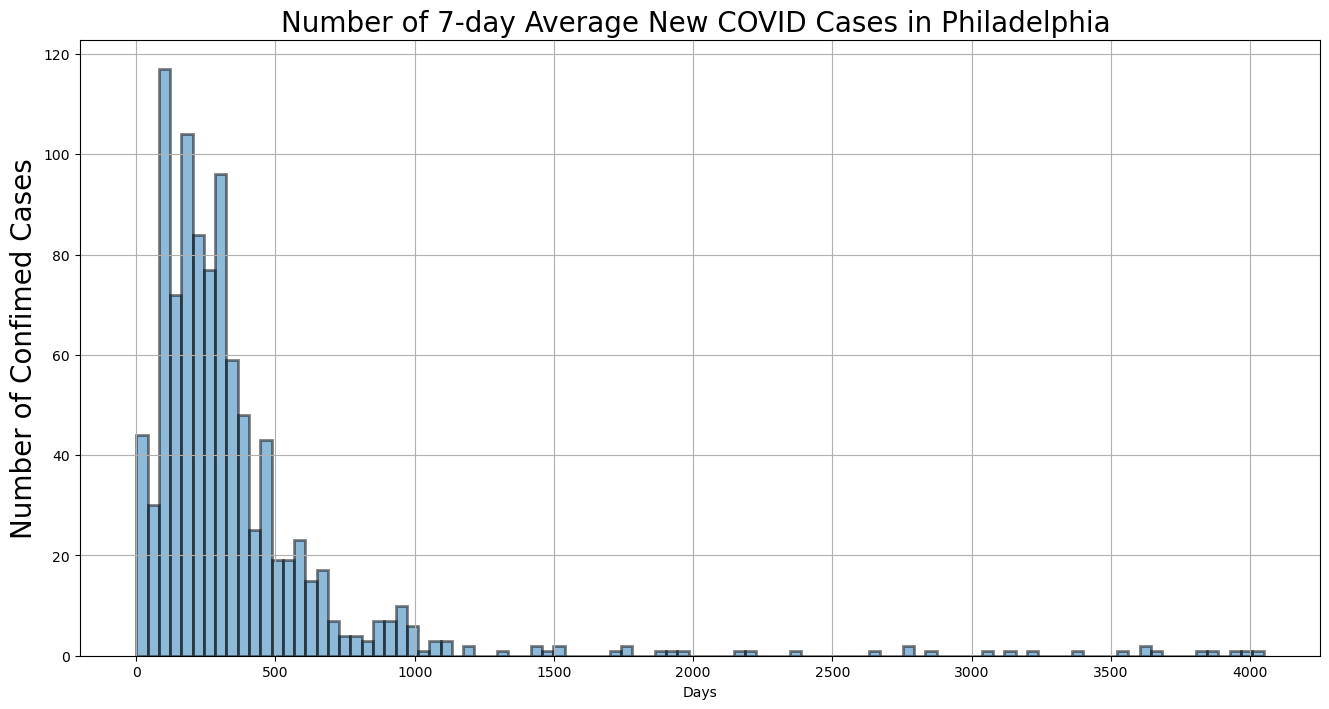

In [40]:
# looking at the distribution of our target variable
target.hist(bins=100, figsize=(16, 8), alpha=0.5,
            edgecolor="black", linewidth=2)
plt.title(
    'Number of 7-day Average New COVID Cases in Philadelphia ', fontsize=20)
plt.xlabel('Days')
plt.ylabel('Number of Confimed Cases', fontsize=20);

### Test Train Split: Target Variable

In [41]:
#this will leave us with 70% of our data in the training set, 20% in the test set, and 10% in our validation set
cutoff_test = round(len(philly_data)*.85)
cutoff_val = round(len(philly_data)*.95)

X_train = symptoms[:cutoff_test]
X_test = symptoms[cutoff_test: cutoff_val]
X_val = symptoms[cutoff_val:]

y_train = target[:cutoff_test]
y_test = target[cutoff_test: cutoff_val]
y_val = target[cutoff_val:]

Lets look at our selected variables individually and then all together.

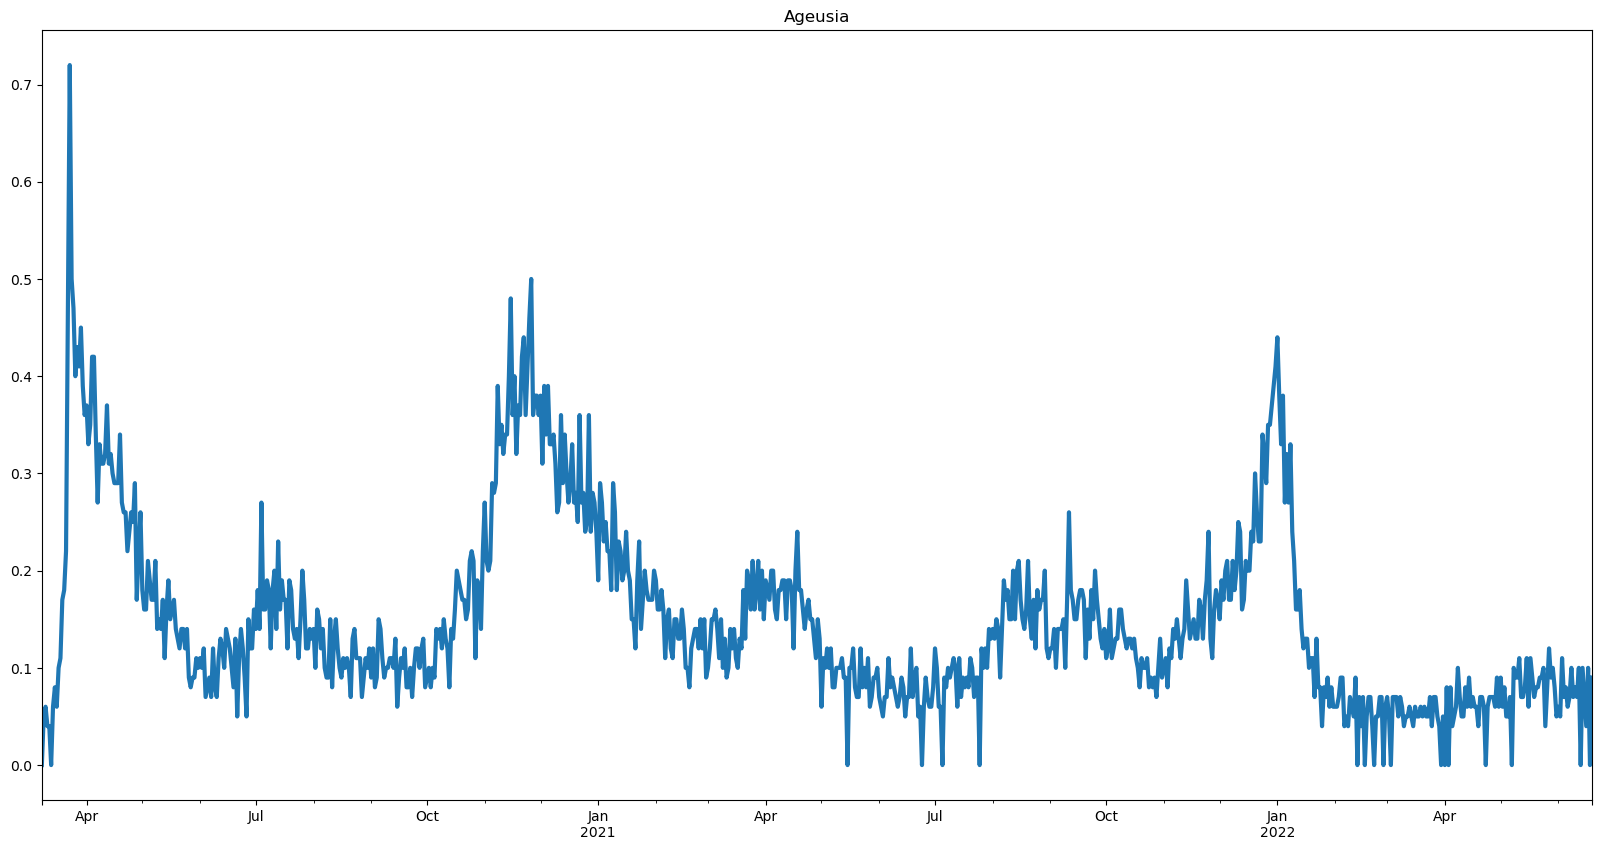

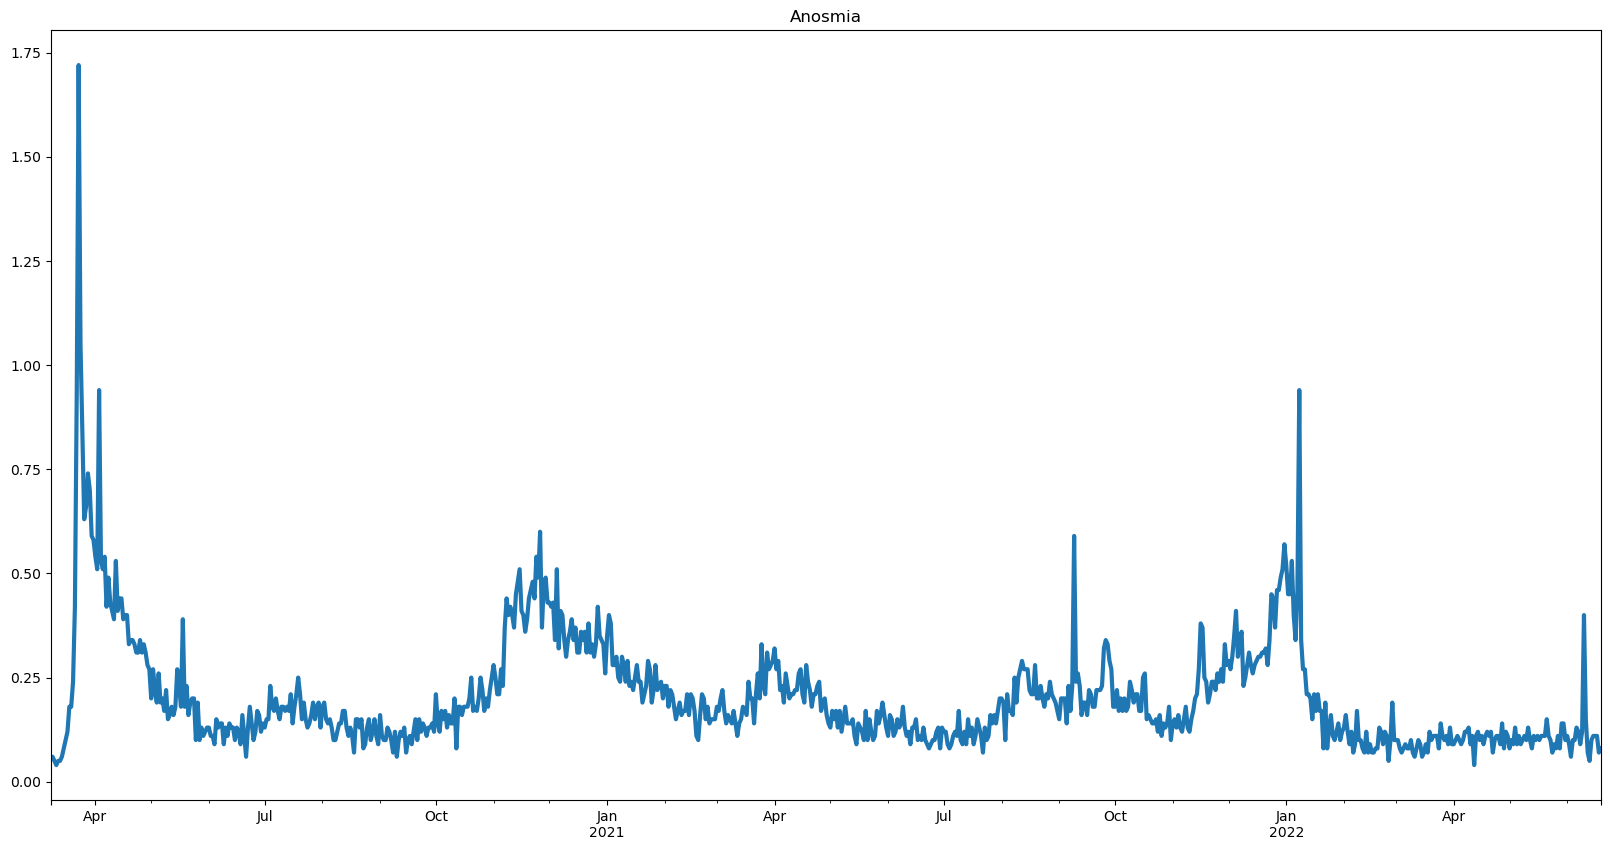

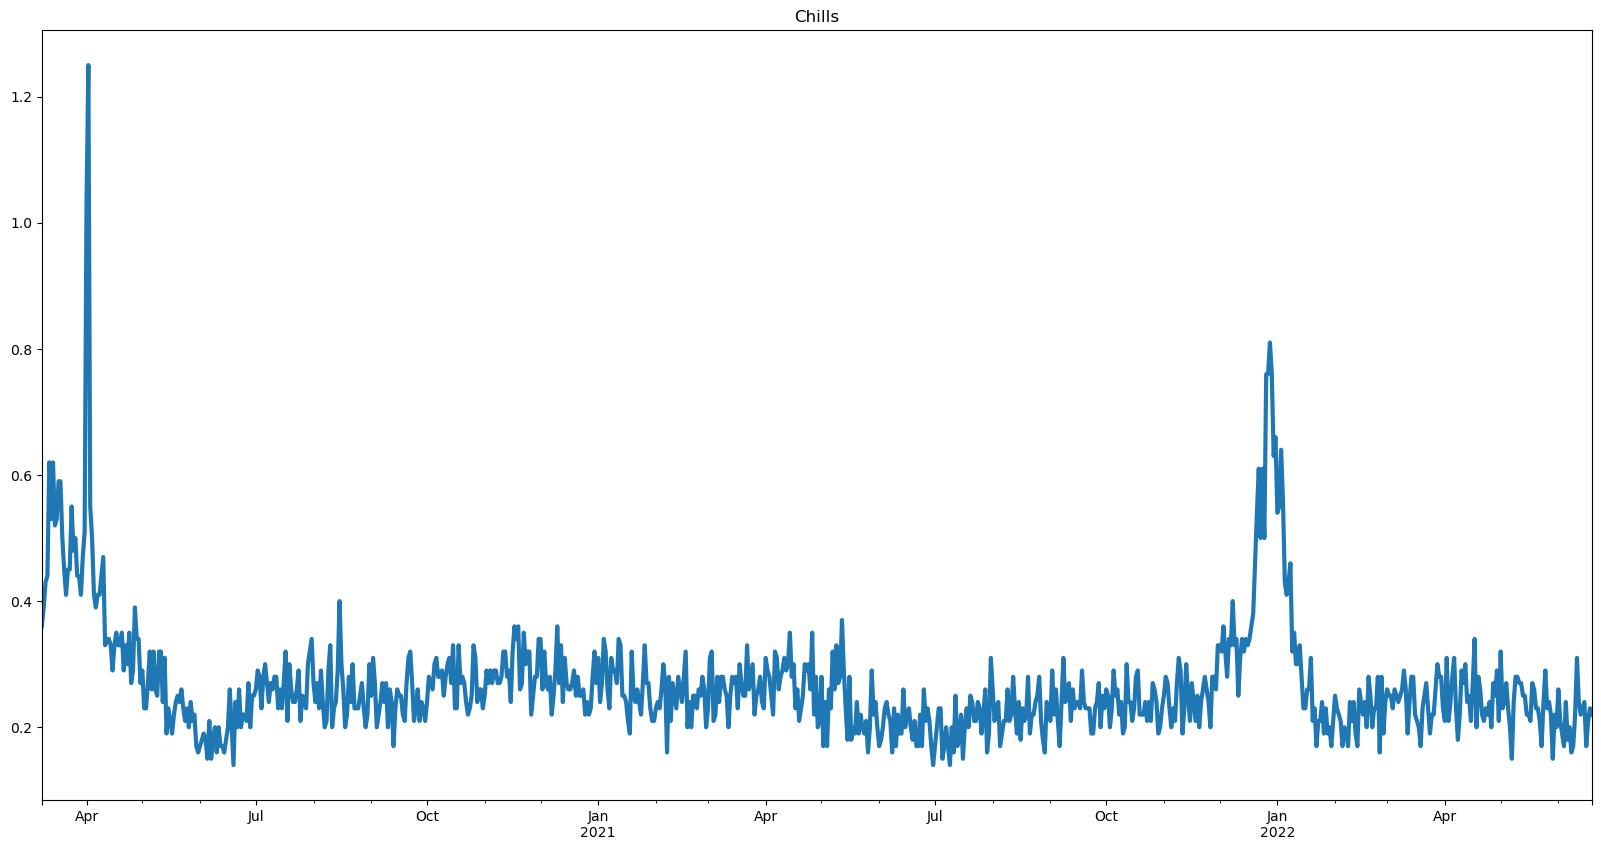

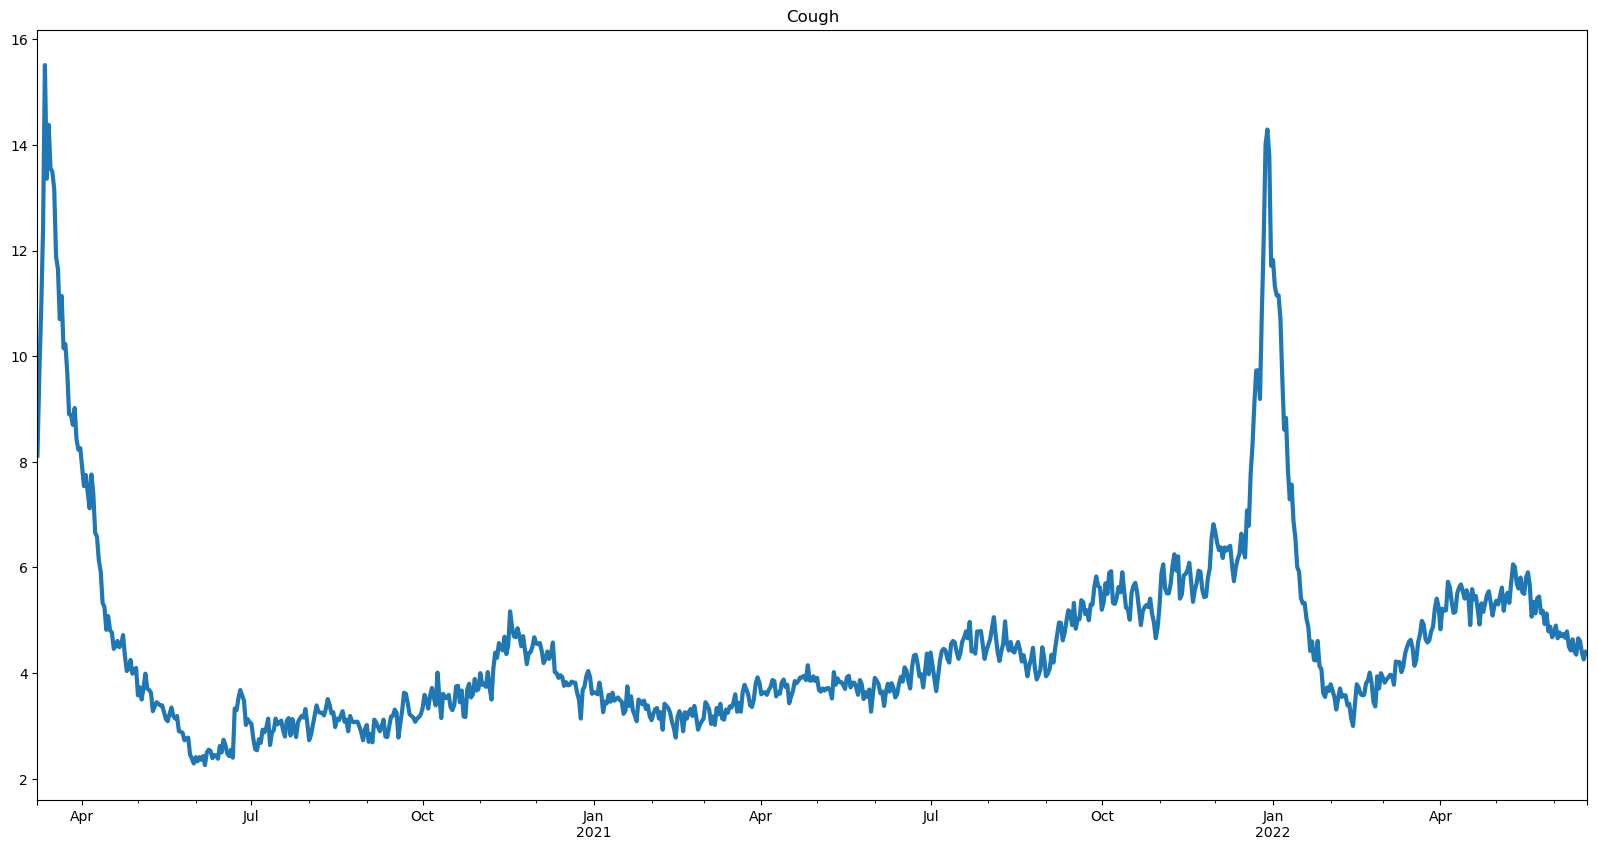

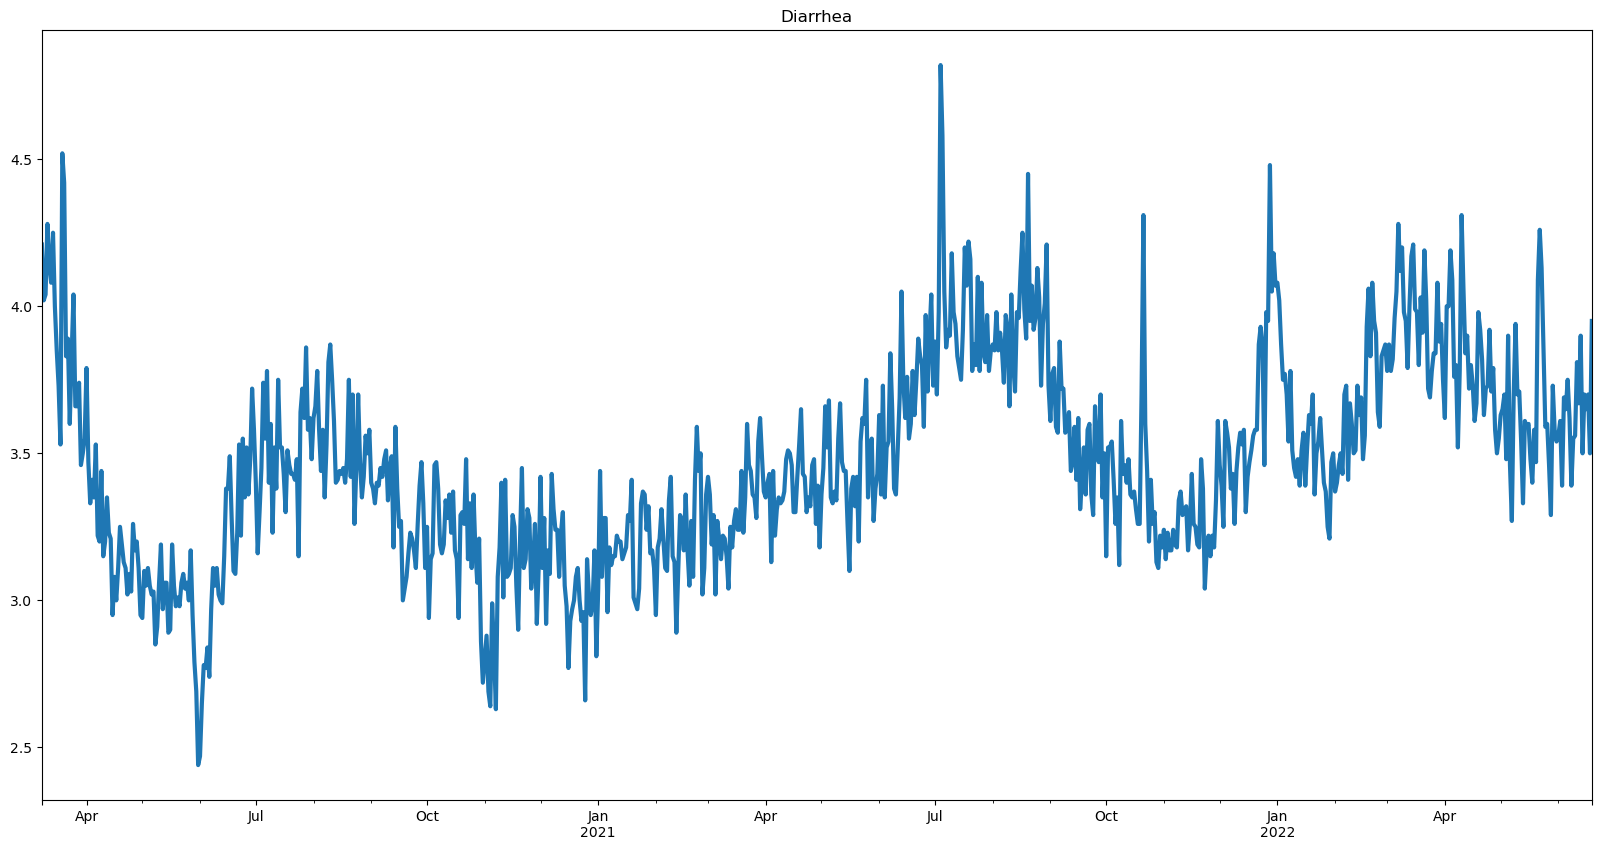

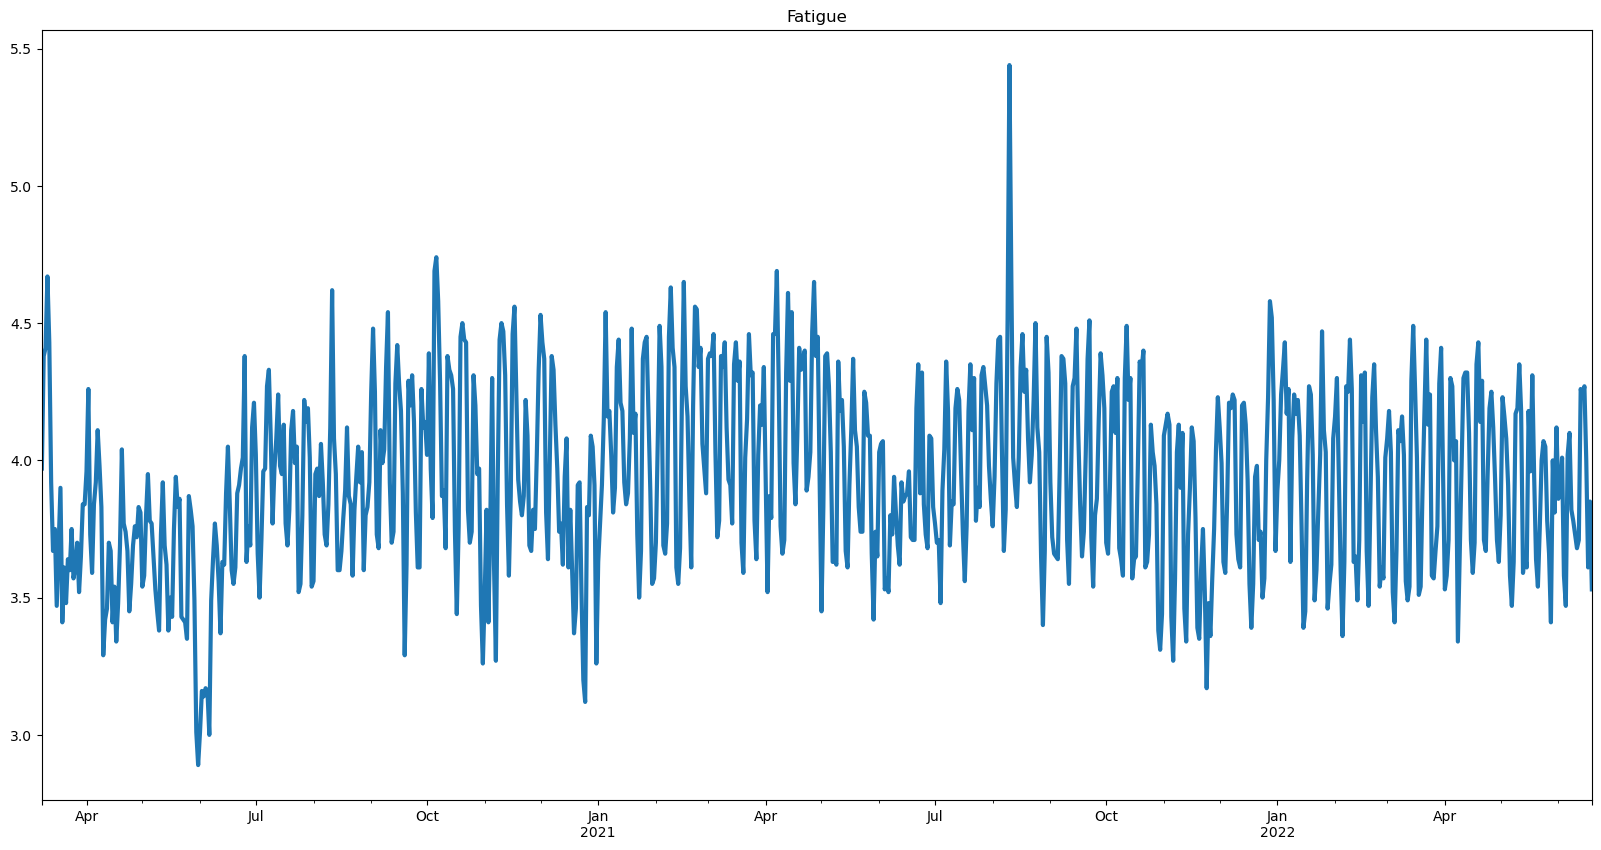

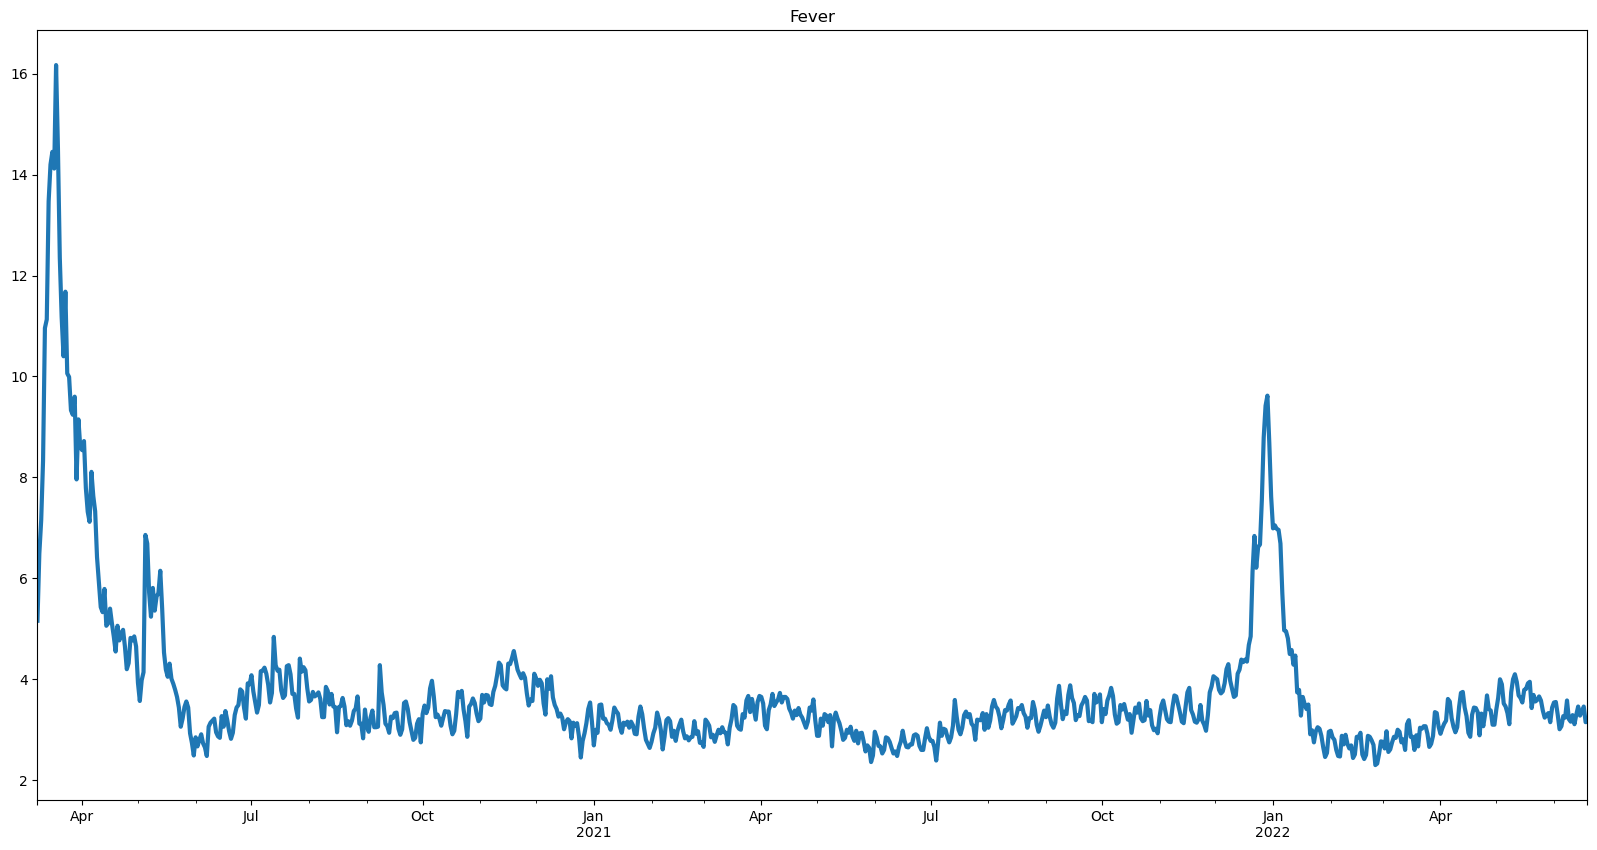

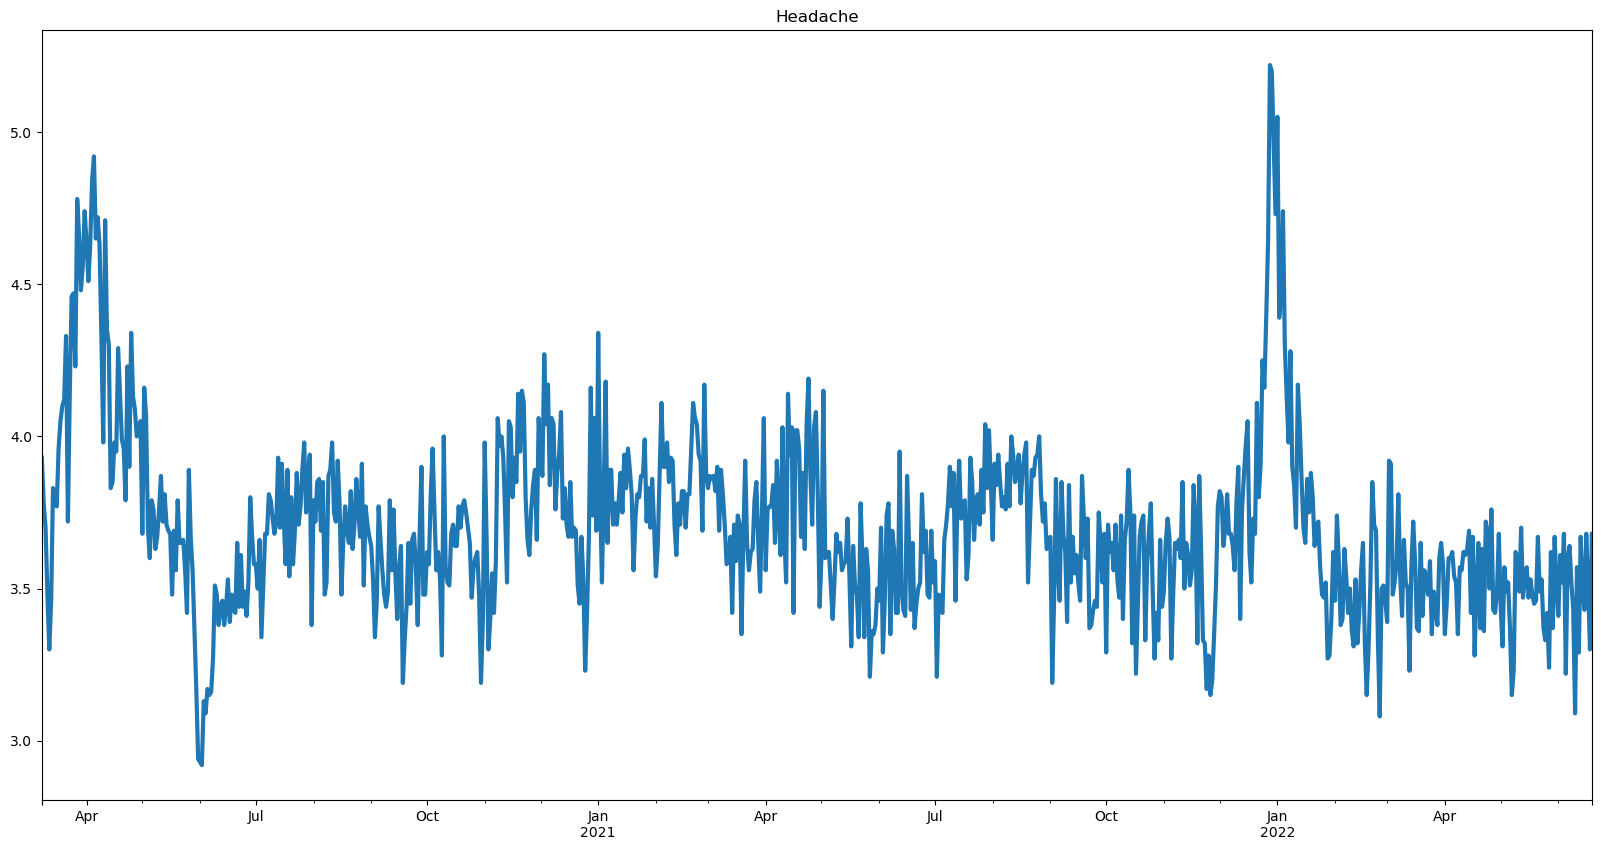

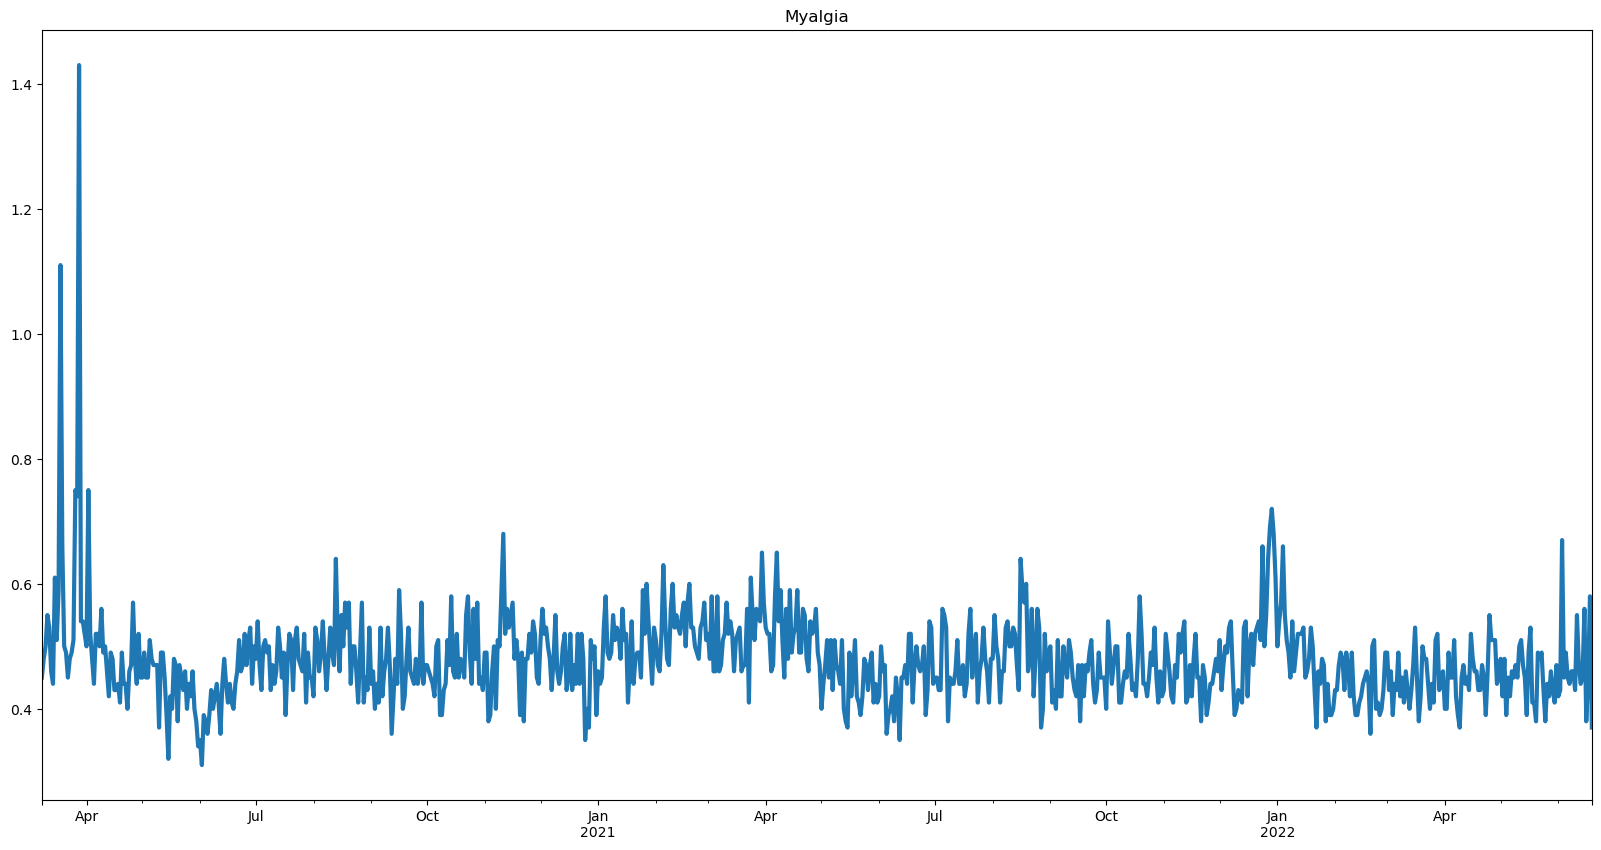

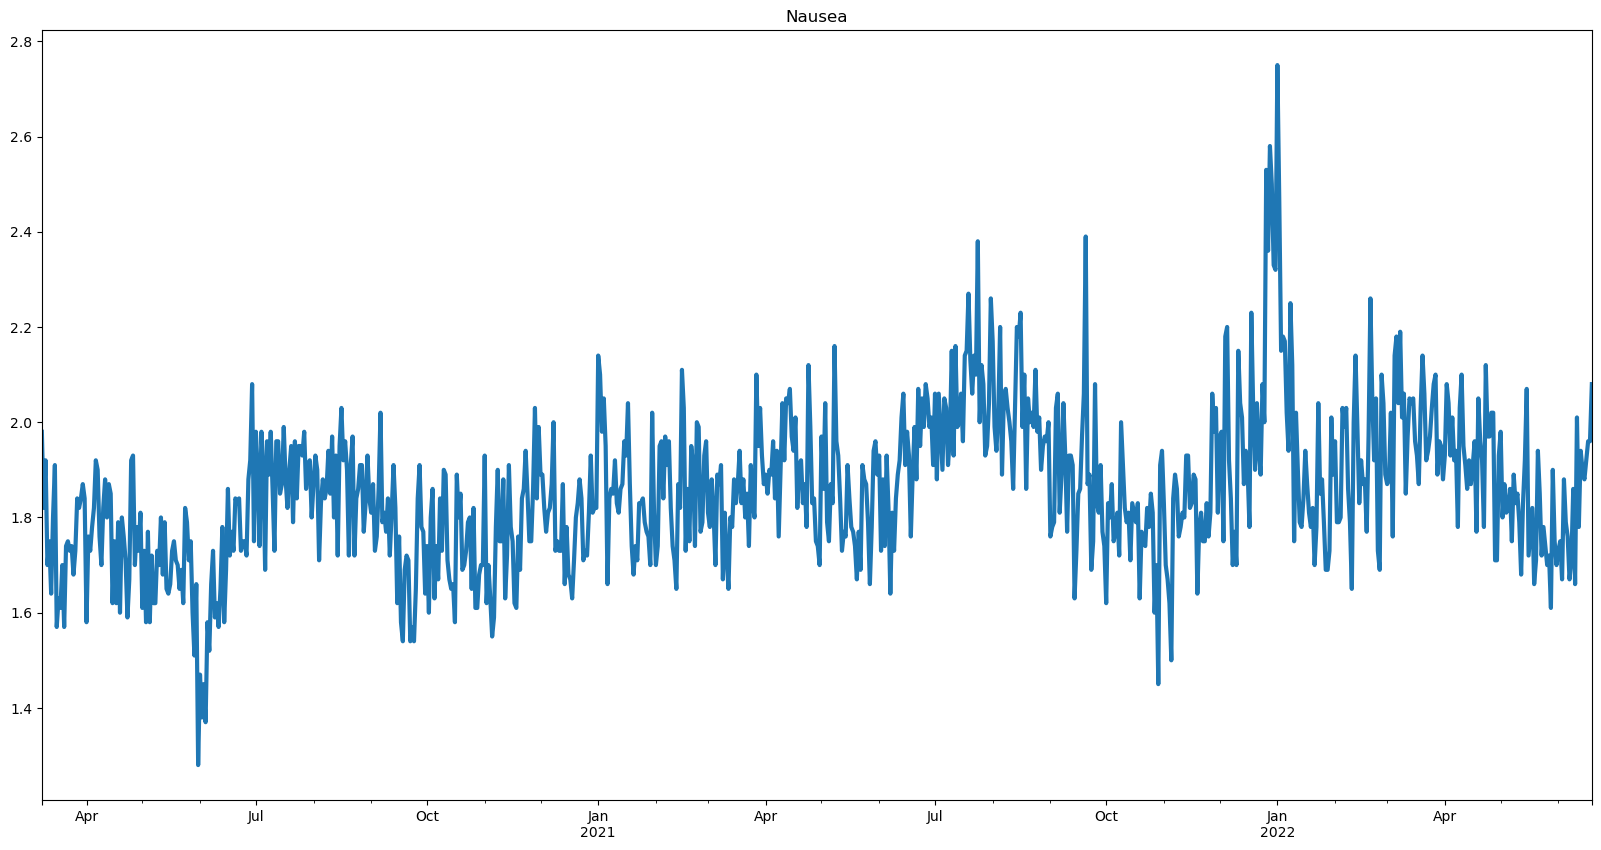

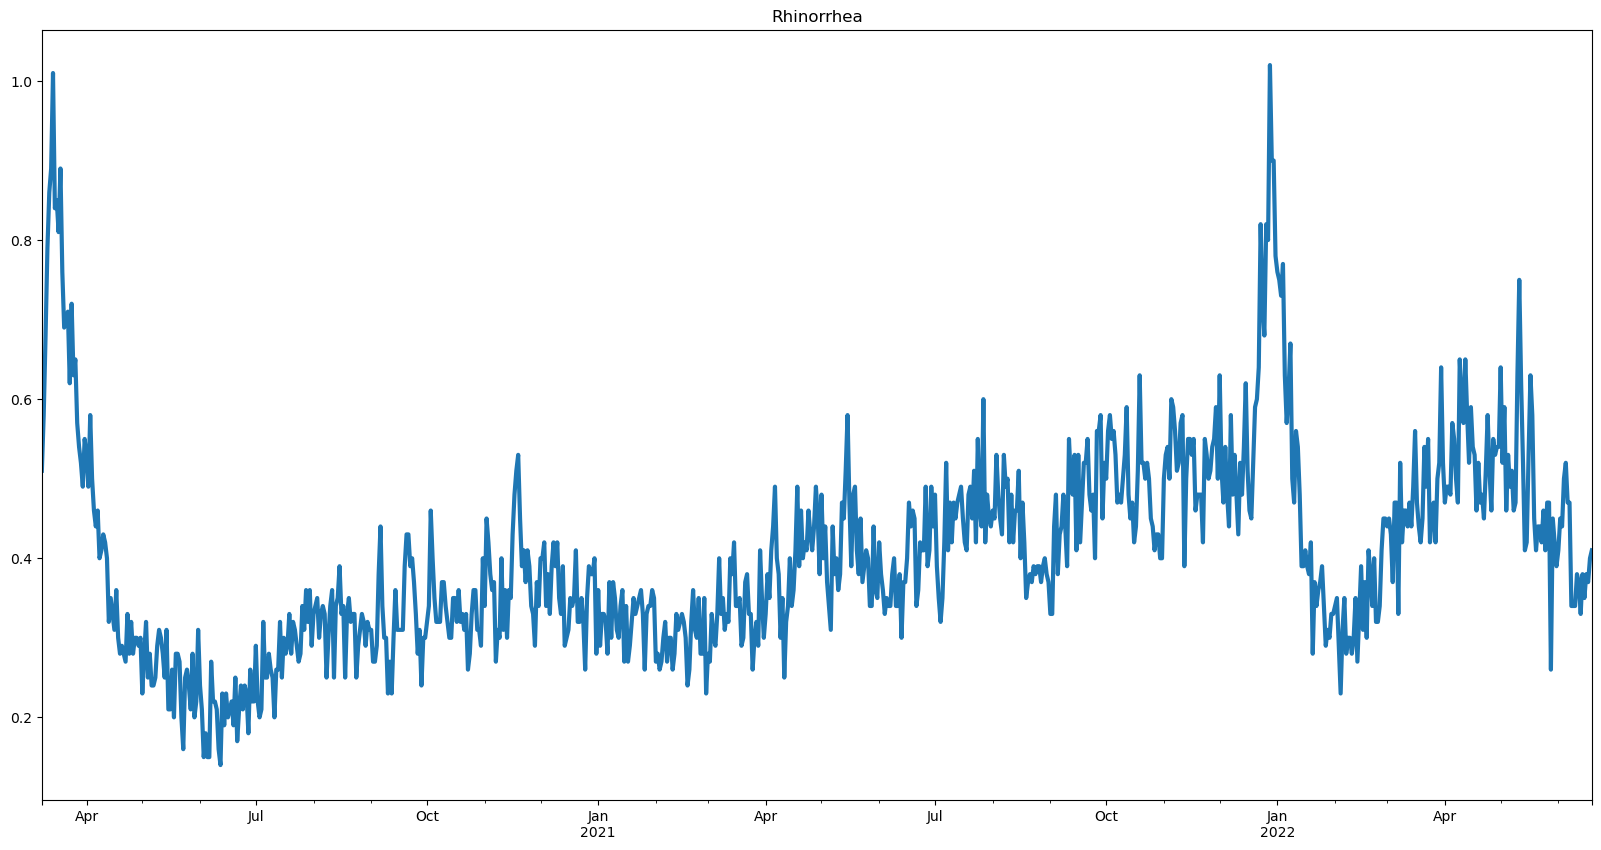

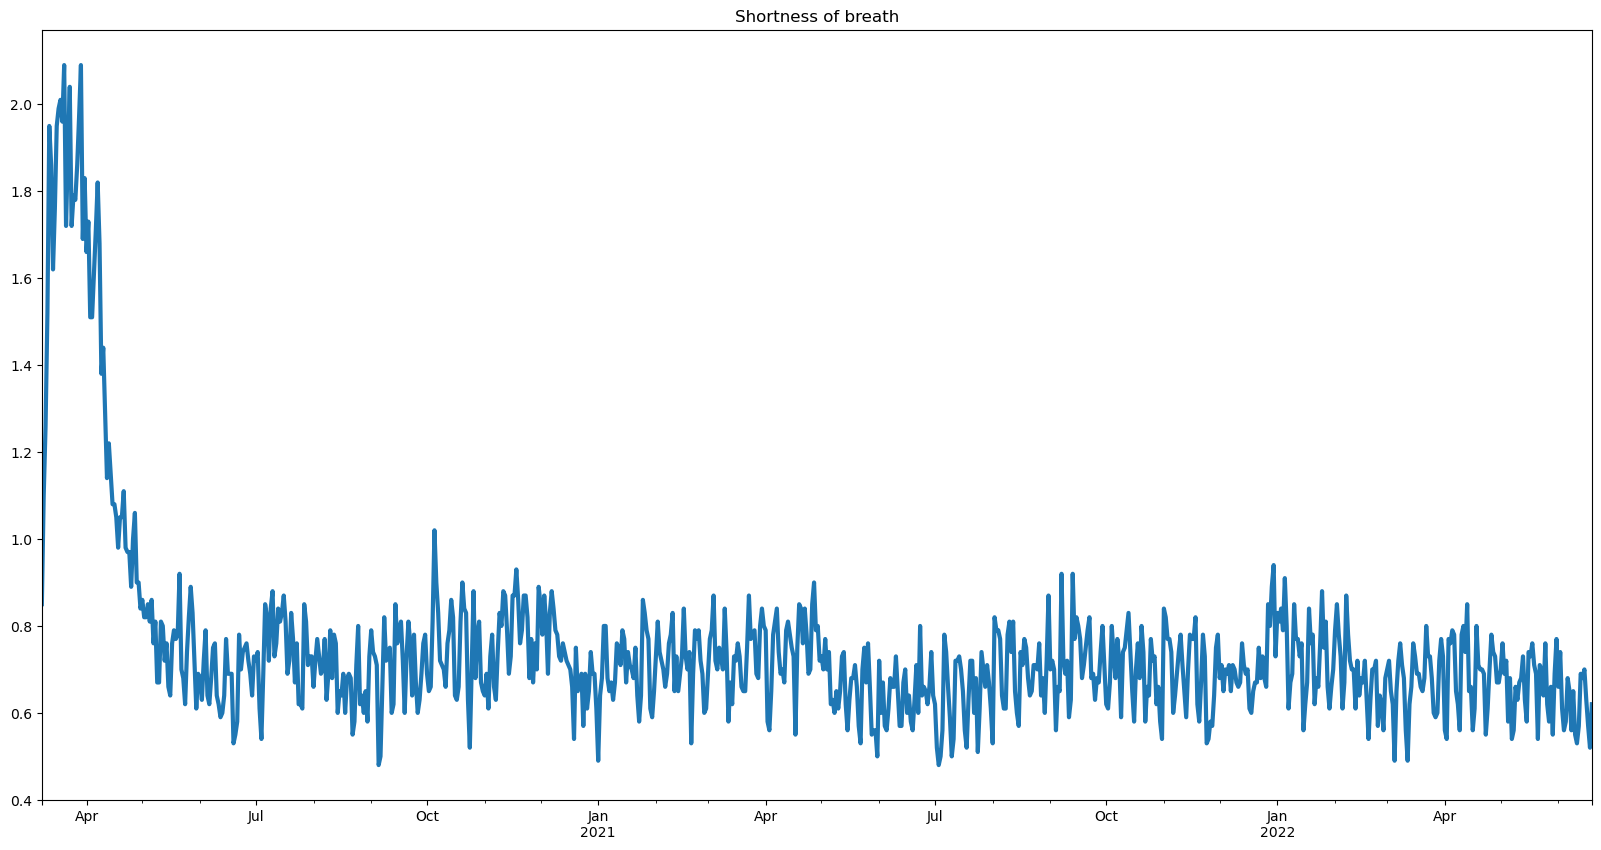

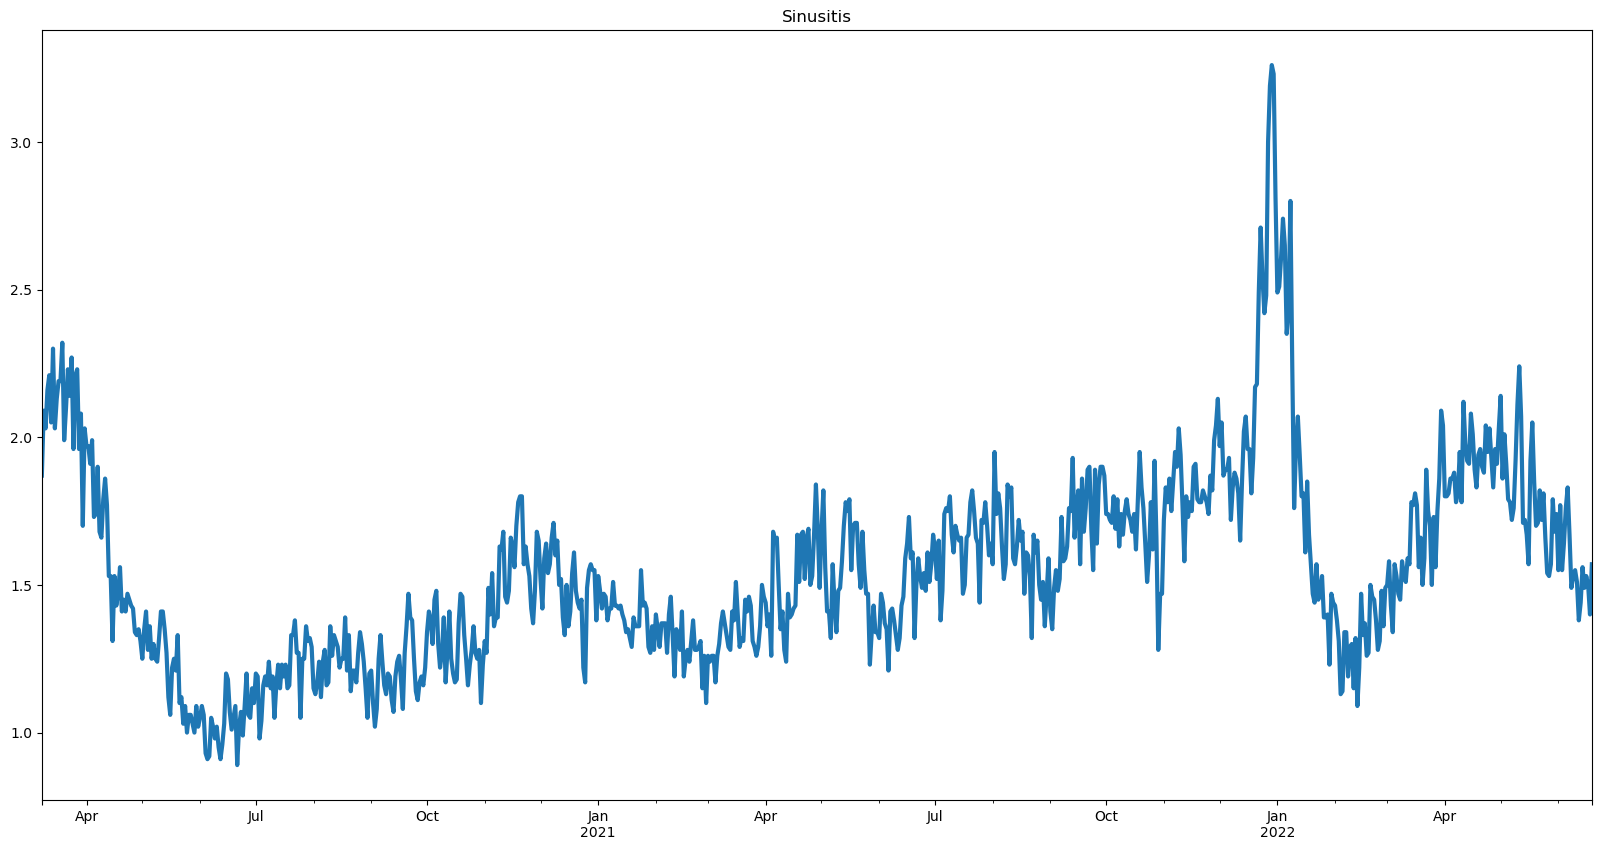

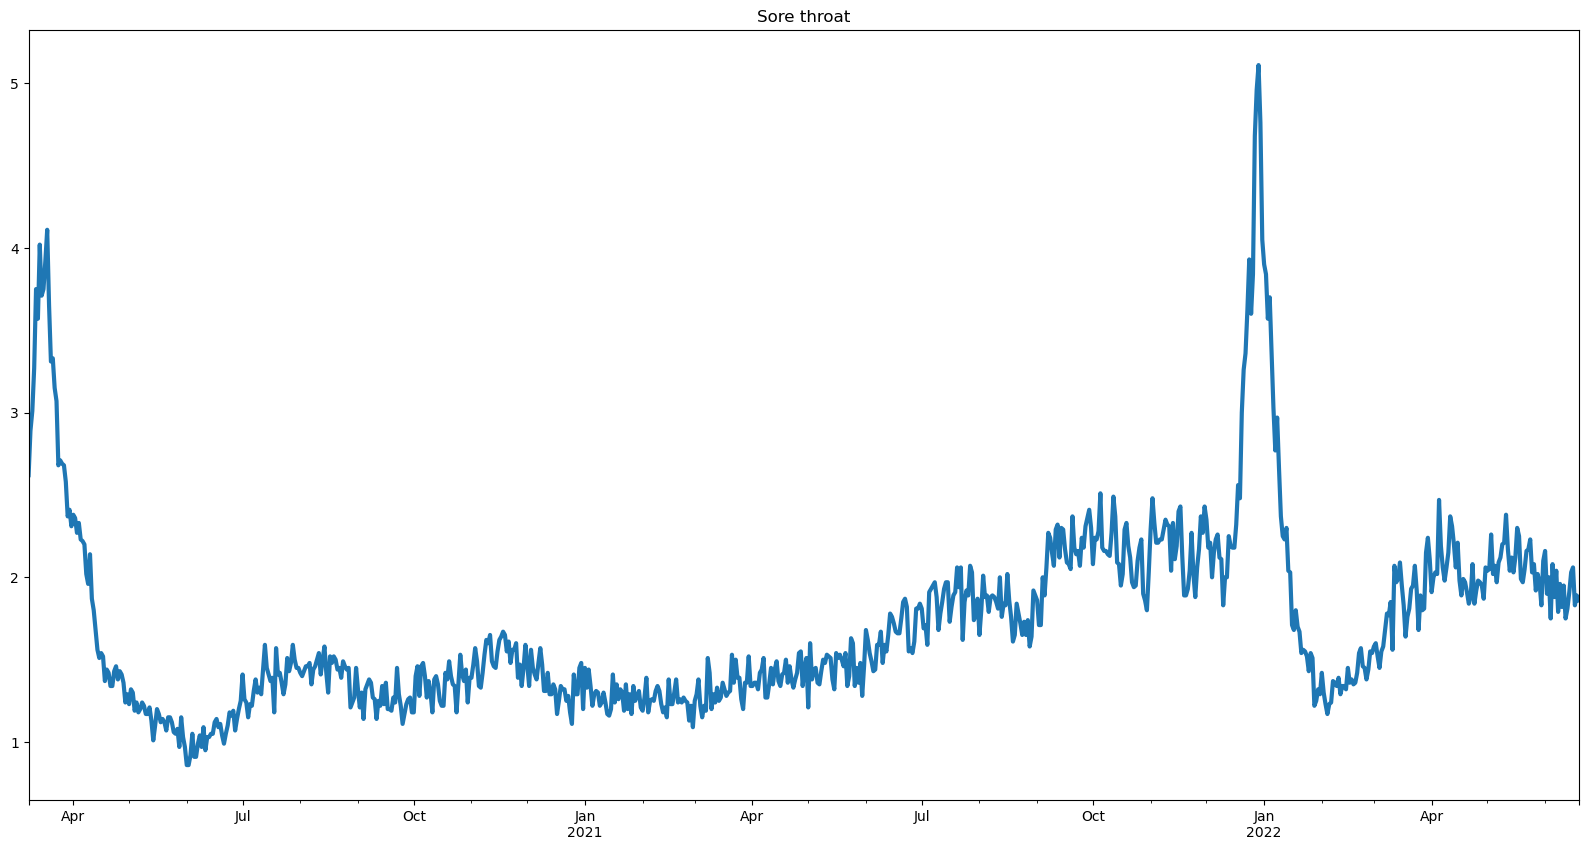

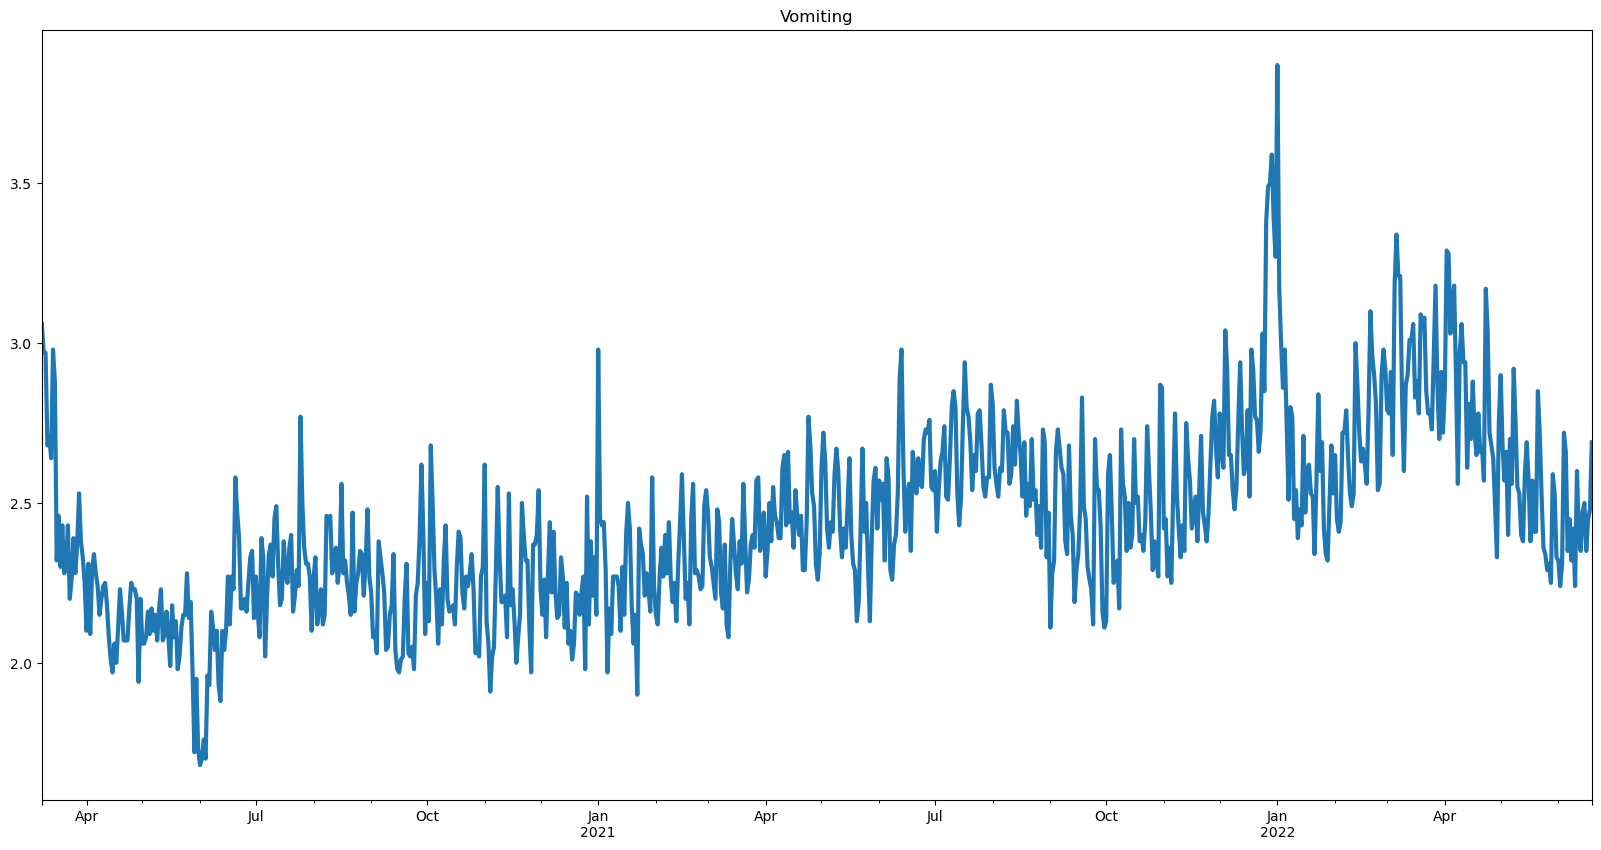

In [43]:
for i in selected_features:
    ax = X_train[i].plot.line(figsize=(20, 10), linewidth=3)
    plt.title(f"{i}")
    plt.show()

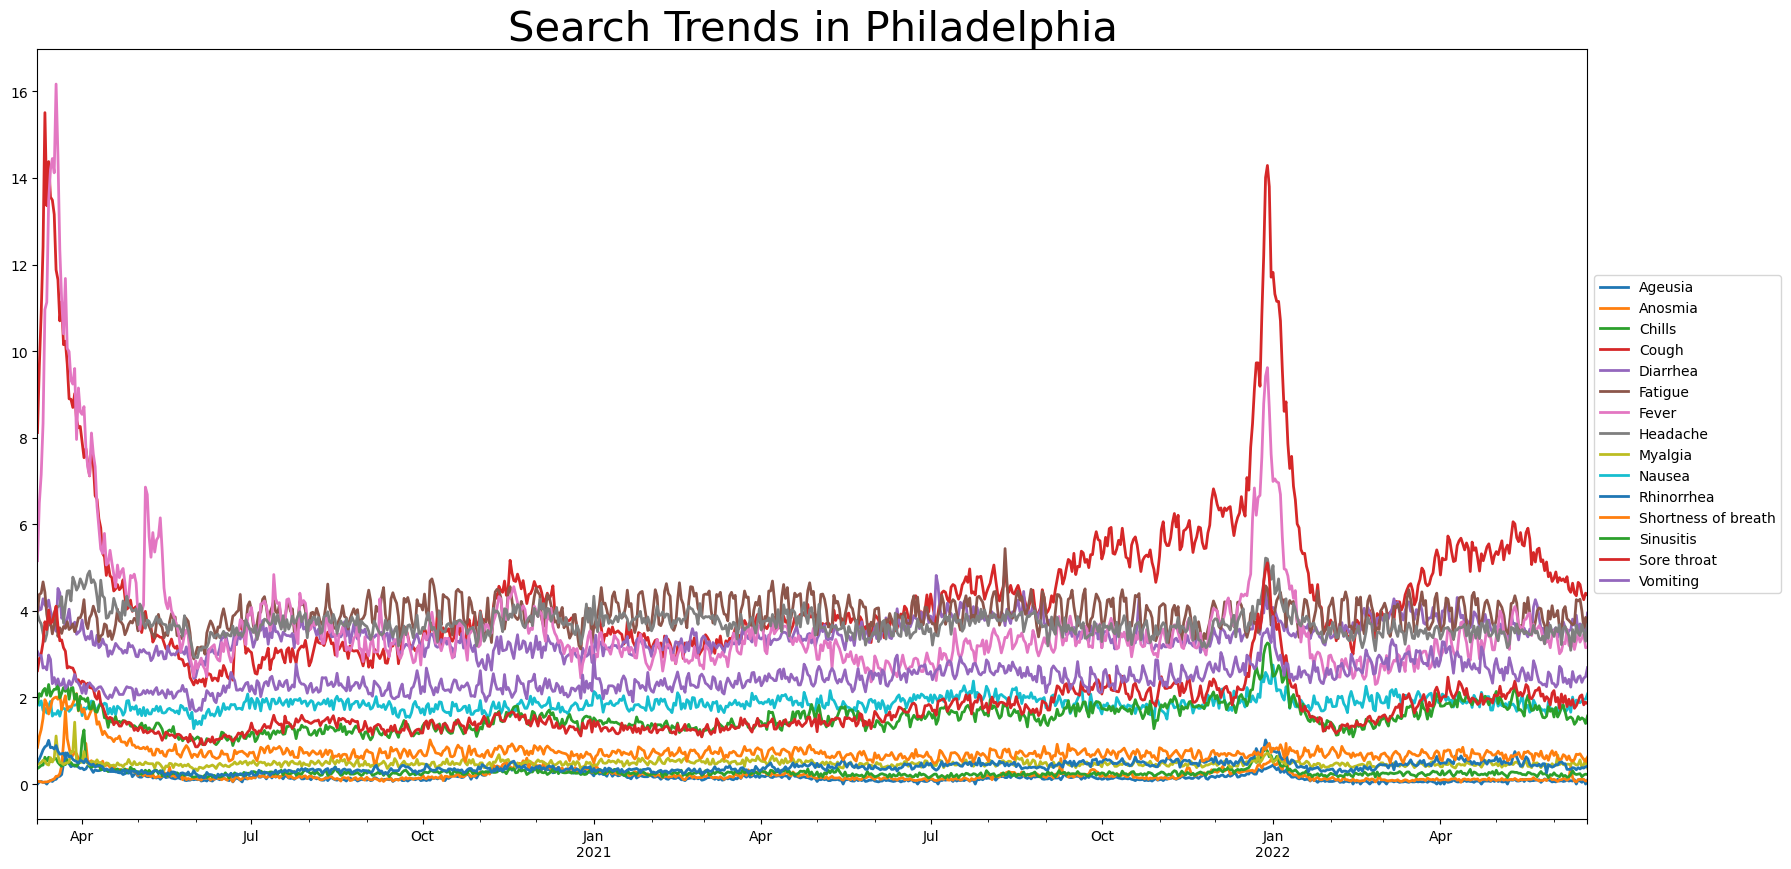

In [44]:
for symp in selected_features:
    ax = X_train[symp].plot.line(figsize=(20, 10), linewidth=2)
    ax.legend(selected_features, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Search Trends in Philadelphia', fontsize=30)

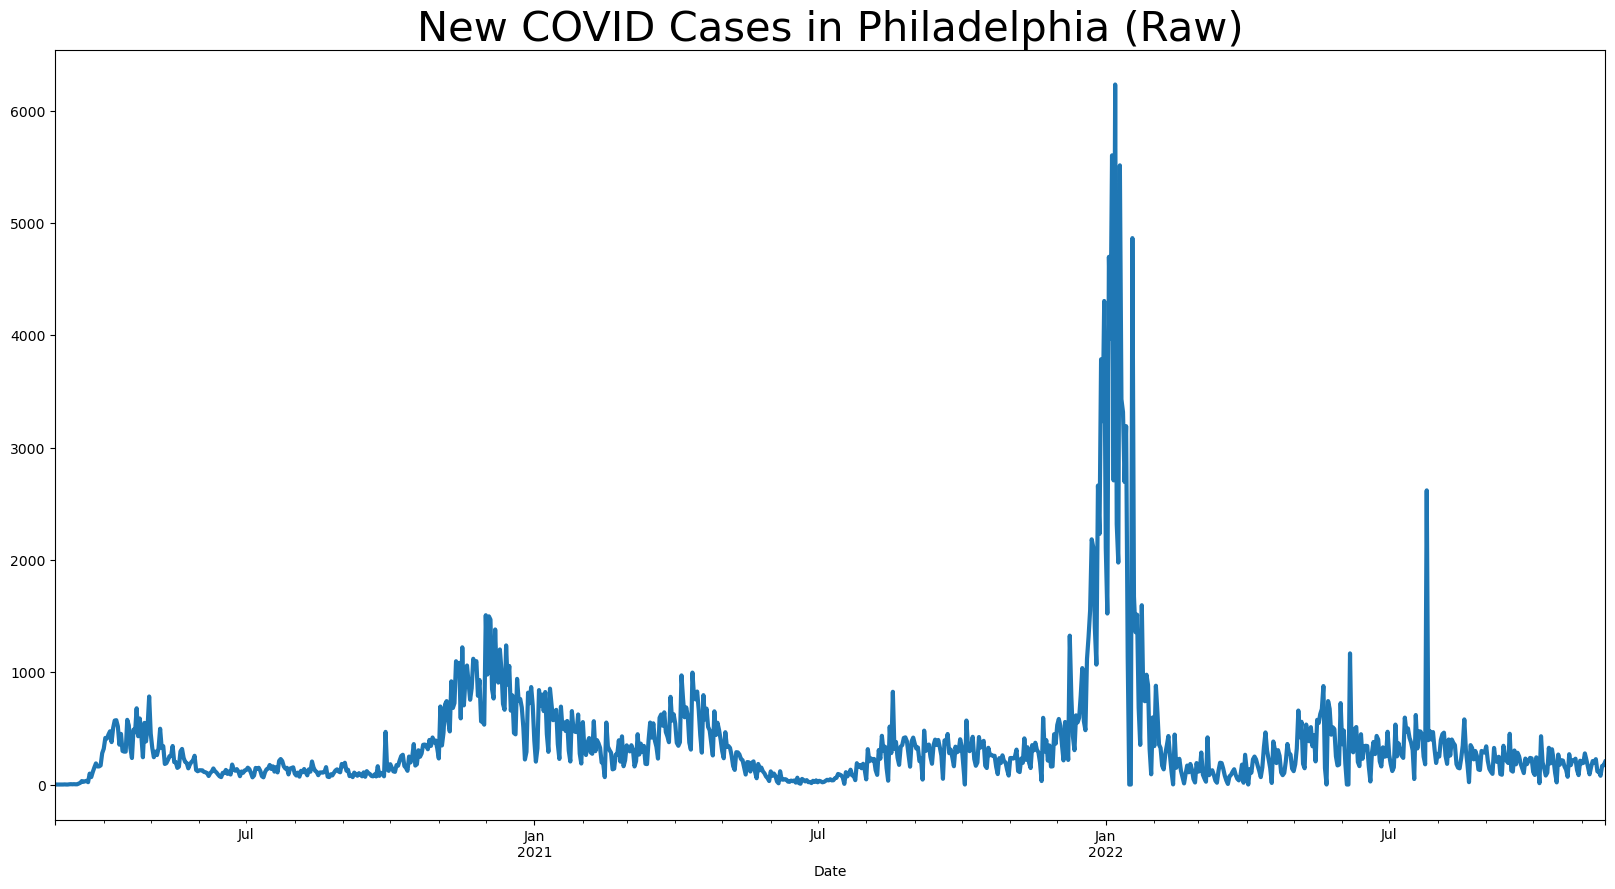

In [49]:
ax = public_philly['New Cases'].plot(figsize=(20, 10), linewidth=3)
plt.title('New COVID Cases in Philadelphia (Raw)', fontsize=30);

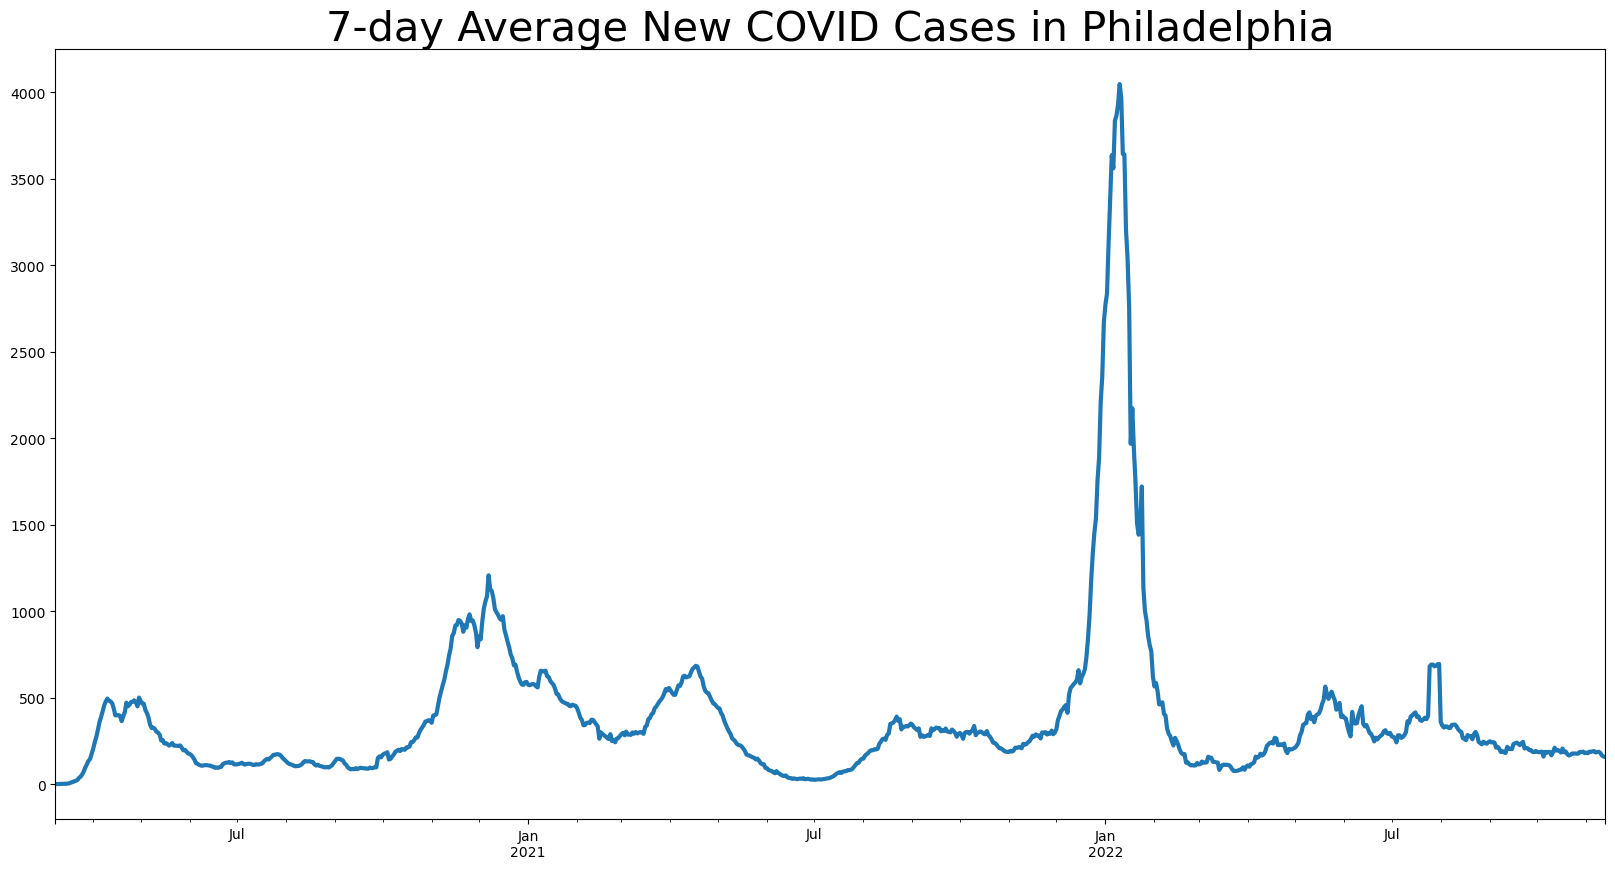

In [51]:
ax = target.plot(figsize=(20, 10), linewidth=3)
plt.title('7-day Average New COVID Cases in Philadelphia', fontsize=30);

## Base Model of the Target Variable
Now that we've seen the target variable, lets check for stationarity. 

In [53]:
# Dicky Fuller Test for Stationarity
def dicky_fuller(TS):
    result = adfuller(TS)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [54]:
# Dicky Fuller Test for Stationarity
dicky_fuller(y_train)

ADF Statistic: -3.749334
p-value: 0.003470
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [56]:

#origionally all of the max elements were set to 5, but that took 2+ hours to run, so I lowered it to 3
def sarima_elements(TS):
    '''
This function will calculate the optimal elements to use in our model. The model we will be using following 
this function requires both the time series and the order of elements in order to create the model. 

An ARIMA model requires 3 elements - p, d, and q. This function will cycle through all numbers between 0-2 
to find the optimal values for these elements.

p - this is the order of the auto-regressive (AR) part of the ARIMA model. This states the lag we want to 
incorporate into our model, thereby enabling our model to take the past into consideration. 
d - integrated (I) part of the model, which states the order of 
how many times the model has been differenced to find optimal  stationarity.
q - this is the moving average (MA) order of the ARIMA model, which represents the error found in the model. 

The seasonal ARIMA contains these three elements along with a seasonal element, set here as 30, to represent 
the approximate number of days in each month.  
    '''
    auto = pm.auto_arima(TS, start_p=4, start_q=0, max_p=7,
                  max_q=3, max_d=3, start_P=0, start_Q=0, max_P=3,
                  max_Q=3, m=52, max_order=None, stepwise=True, 
                  trace=True, random_state = 42)
    return auto

In [57]:
%%time
target_elements = sarima_elements(y_train)


Performing stepwise search to minimize aic
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=8876.920, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=9136.586, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=9075.439, Time=2.84 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=9101.185, Time=4.07 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=9134.612, Time=0.02 sec
 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=8878.812, Time=6.93 sec
 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=8878.809, Time=6.42 sec
 ARIMA(4,1,0)(1,0,1)[52] intercept   : AIC=8880.777, Time=13.13 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=8888.247, Time=0.14 sec
 ARIMA(5,1,0)(0,0,0)[52] intercept   : AIC=8861.208, Time=0.46 sec
 ARIMA(5,1,0)(1,0,0)[52] intercept   : AIC=8863.039, Time=12.06 sec
 ARIMA(5,1,0)(0,0,1)[52] intercept   : AIC=8863.037, Time=8.60 sec
 ARIMA(5,1,0)(1,0,1)[52] intercept   : AIC=8865.035, Time=14.38 sec
 ARIMA(6,1,0)(0,0,0)[52] intercept   : AIC=8861.188, Time=0.62 sec
 ARIMA(6,1,0)(1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  834
Model:               SARIMAX(7, 1, 0)   Log Likelihood               -4352.801
Date:                Wed, 19 Apr 2023   AIC                           8721.603
Time:                        10:39:35   BIC                           8759.403
Sample:                             0   HQIC                          8736.096
                                - 834                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0272      0.008      3.532      0.000       0.012       0.042
ar.L2          0.2709      0.012     21.810      0.000       0.247       0.295
ar.L3          0.2826      0.014     20.812      0.000       0.256       0.309
ar.L4          0.2042      0.012     17.367      0.000       0.181       0.227
ar.L5          0.2285      0.010     22.502      0.000       0.209       0.248
ar.L6          0.0521      0.014      3.827      0.000       0.025       0.079
ar.L7         -0.3920      0.009    -43.318      0.000      -0.410      -0.374
sigma2      2019.5911     28.360     71.213      0.000    1964.007    2075.175
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             60708.04
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              11.73   Skew:                            -1.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

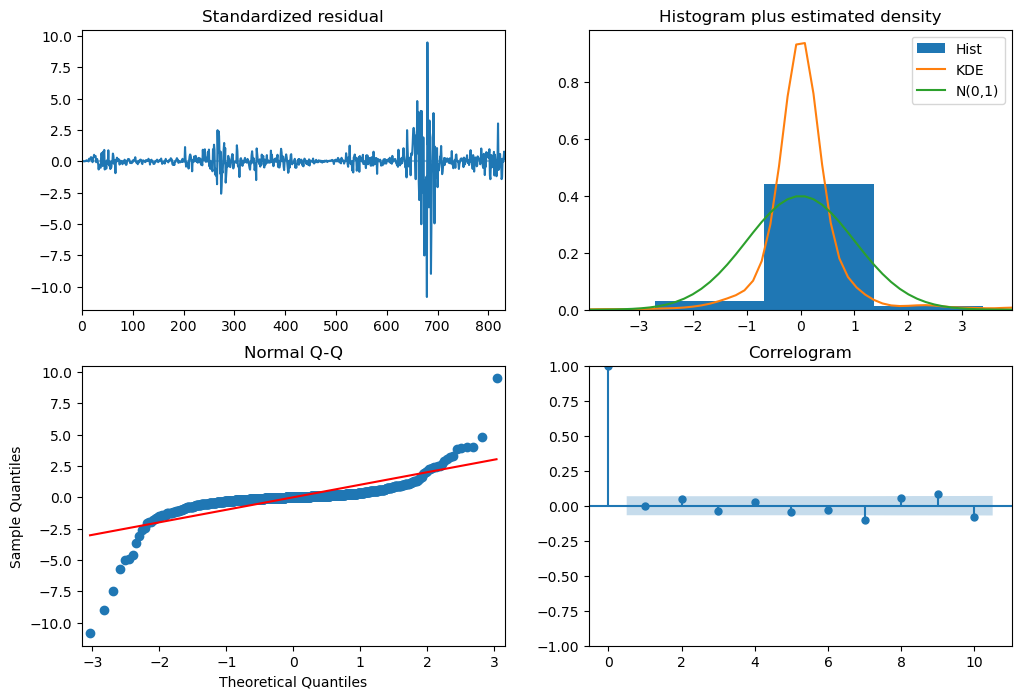

In [58]:
target_elements.plot_diagnostics(figsize=(12,8))
target_elements.summary()


In [59]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX((y_train), order=target_elements.order, 
                                        seasonal_order=target_elements.seasonal_order,enforce_stationarity=False, 
                                        enforce_invertibility=False)

    # Fit the model and return the results
output = ARIMA_MODEL.fit()

output_forcast = output.get_forecast(steps= 100)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17832D+00    |proj g|=  8.28670D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      0      1      0     0     0   8.287D-06   5.178D+00
  F =   5.1783243881960068     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [ ]:
output_conf= output_forcast.conf_int()

In [ ]:
def plot_model_and_prediction(prediction, df_train, df_test, symptom): 
    #plot our model and it's predicted values
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(df_train, label='Training Data')
    ax.plot(df_test, label='Testing Data')
    prediction.predicted_mean.plot(ax=ax, label='Forecasted Value')
    plt.title(f"{symptom} Forcast", fontsize=30)
    ax.set_xlabel('Dates')
    ax.set_ylabel('7-Day Average Cases')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
plot_model_and_prediction(output_forcast, y_train, y_test, "New Cases")

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y_train, model='additive', 
                            extrapolate_trend='freq') #additive or multiplicative is data specific
fig = decomposition.plot()
plt.show()